In [173]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc, rcParams
import adjustText
import os
import math
import numpy as np
from scipy import constants
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap
from matplotlib import colors
import scipy
import scipy.constants as sc
import astropy
import astropy.constants as astro_cons

In [174]:
electron_mass_cgs = astro_cons.m_e.cgs.value
electron_charge_cgs = astro_cons.e.gauss.value
solar_mass_cgs = astro_cons.M_sun.cgs.value
planck_bar_cgs = astro_cons.hbar.cgs.value
light_c_cgs = astro_cons.c.cgs.value

In [175]:
df_sources_data = pd.read_csv('PPdotB_LumkTage_allclasses_04042023.csv')
#df_data['delta_lum'] = df_data['lumin_peak'] / df_data['luminosity_bol_qui(e33erg/s)']
#df_data['mag_pow'] = df_data['Bp(e14G)'] * df_data['Bp(e14G)'] / (8*3.141592653589793)
df_sources_data

,source,radio,association,class,distance(kpc),l(deg),b(deg),period(s),pdot(1e-11s/s),pdot_ul,...,luminosity_bol_qui(e33erg/s),lum_ul,kT_min,Err_kT_min,kT_min_ul,lumin_peak,kT_max,Err_kT_max,kT_max_ul,Unnamed: 27
0,CXOUJ185238.6+0040,NaN,SNR Kes79,CCO,7.10,33.667347,0.038728,0.105000,8.700000e-07,NaN,...,12.000,NaN,0.133,0.001,NaN,NaN,NaN,NaN,NaN,NaN
1,1E1207.4-5209,NaN,SNR G296.5+10.0,CCO,2.35,296.545164,9.916088,0.424000,2.200000e-06,NaN,...,3.000,NaN,0.250,0.100,NaN,NaN,NaN,NaN,NaN,NaN
2,RXJ0822.0-4300,NaN,SNR PuppisA,CCO,2.20,260.572541,-3.495317,0.113000,9.300000e-07,NaN,...,4.000,NaN,0.450,0.050,NaN,NaN,NaN,NaN,NaN,NaN
3,1E161348-5055,NaN,SNR RCW103,CCO,3.30,332.428951,-0.373763,24030.000000,7.000000e+01,True,...,2.800,NaN,0.400,0.100,NaN,220.0,1.2,0.1,NaN,NaN
4,CXOJ085201.4-461753,NaN,SNR Vela Jr,CCO,0.77,NaN,NaN,NaN,NaN,NaN,...,0.200,NaN,0.090,0.010,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,PSRJ0901-4046,True,NaN,LongP,0.30,NaN,NaN,75.885547,2.250000e-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,GLEAM-XJ162759-523504,True,NaN,LongP,1.30,NaN,NaN,1091.000000,1.500000e+02,True,...,0.001,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,GPMJ1839-10,True,NaN,LongP,5.30,NaN,NaN,1318.000000,8.100000e-02,True,...,0.010,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
atnf_data = pd.read_csv('atnf-catalog-10-02-2023.csv', delimiter=';')

In [151]:
atnf_data

,#,P0,P1,BSURF,Unnamed: 4
0,1,0.115364,5.97e-15,8.40e+11,NaN
1,2,0.693748,2.10e-15,1.22e+12,NaN
2,3,0.315873,3.60e-13,1.08e+13,NaN
3,4,2.552870,*,*,NaN
4,5,1.240699,5.64e-16,8.47e+11,NaN
...,...,...,...,...,...
3354,3355,1.164000,*,*,NaN
3355,3356,0.557996,*,*,NaN
3356,3357,0.944784,1.63e-14,3.97e+12,NaN
3357,3358,0.003719,3.22e-21,1.11e+08,NaN


In [152]:
atnf_data_clean = atnf_data[atnf_data['BSURF']!='*']

In [153]:
atnf_data_clean

,#,P0,P1,BSURF,Unnamed: 4
0,1,0.115364,5.97e-15,8.40e+11,NaN
1,2,0.693748,2.10e-15,1.22e+12,NaN
2,3,0.315873,3.60e-13,1.08e+13,NaN
4,5,1.240699,5.64e-16,8.47e+11,NaN
5,6,2.314131,1.04e-15,1.57e+12,NaN
...,...,...,...,...,...
3350,3351,1.181463,1.36e-15,1.28e+12,NaN
3353,3354,1.011727,8.80e-16,9.55e+11,NaN
3356,3357,0.944784,1.63e-14,3.97e+12,NaN
3357,3358,0.003719,3.22e-21,1.11e+08,NaN


In [154]:
df_models_data = pd.read_csv('cooling_curves_1.4Msun_ppdot_all_1e6yr.csv')

In [155]:
df_atnf_data = pd.read_csv('ATNF_catalog_Pgr0.01_25062021.csv', delimiter=';')
df_atnf_data

,NAME,PSRJ,P0,P1,BINARY,PB,DIST,ASSOC,AGE,BSURF,EDOT
2474,J1847-0130,J1847-0130,6.707046,1.270000e-12,*,*,5.801,*,8.330000e+04,9.360000e+13,1.670000e+32
2408,J1718-3718,J1718-3718,3.378574,1.610000e-12,*,*,3.918,*,3.320000e+04,7.470000e+13,1.650000e+33
2434,J1814-1744,J1814-1744,3.975905,7.450000e-13,*,*,5.037,*,8.460000e+04,5.510000e+13,4.680000e+32
1907,J1734-3333,J1734-3333,1.169341,2.280000e-12,*,*,4.461,*,8.130000e+03,5.220000e+13,5.630000e+34
2438,J1819-1458,J1819-1458,4.263213,5.630000e-13,*,*,3.301,XRS:CXOU_J181939.1-145804[mrg+07],1.200000e+05,4.960000e+13,2.870000e+32
...,...,...,...,...,...,...,...,...,...,...,...
78,J1434+7257,J1434+7257,0.041741,5.500000e-19,*,*,0.974,*,1.200000e+09,4.850000e+09,2.990000e+32
94,J0609+2130,J0609+2130,0.055698,2.350000e-19,*,*,0.574,*,3.760000e+09,3.660000e+09,5.370000e+31
112,J1729-2117,J1729-2117,0.066293,1.720000e-19,*,*,0.974,*,6.110000e+09,3.420000e+09,2.330000e+31
98,J2235+1506,J2235+1506,0.059767,1.580000e-19,*,*,1.54,*,6.010000e+09,3.110000e+09,2.910000e+31


## P - Pdot plain 

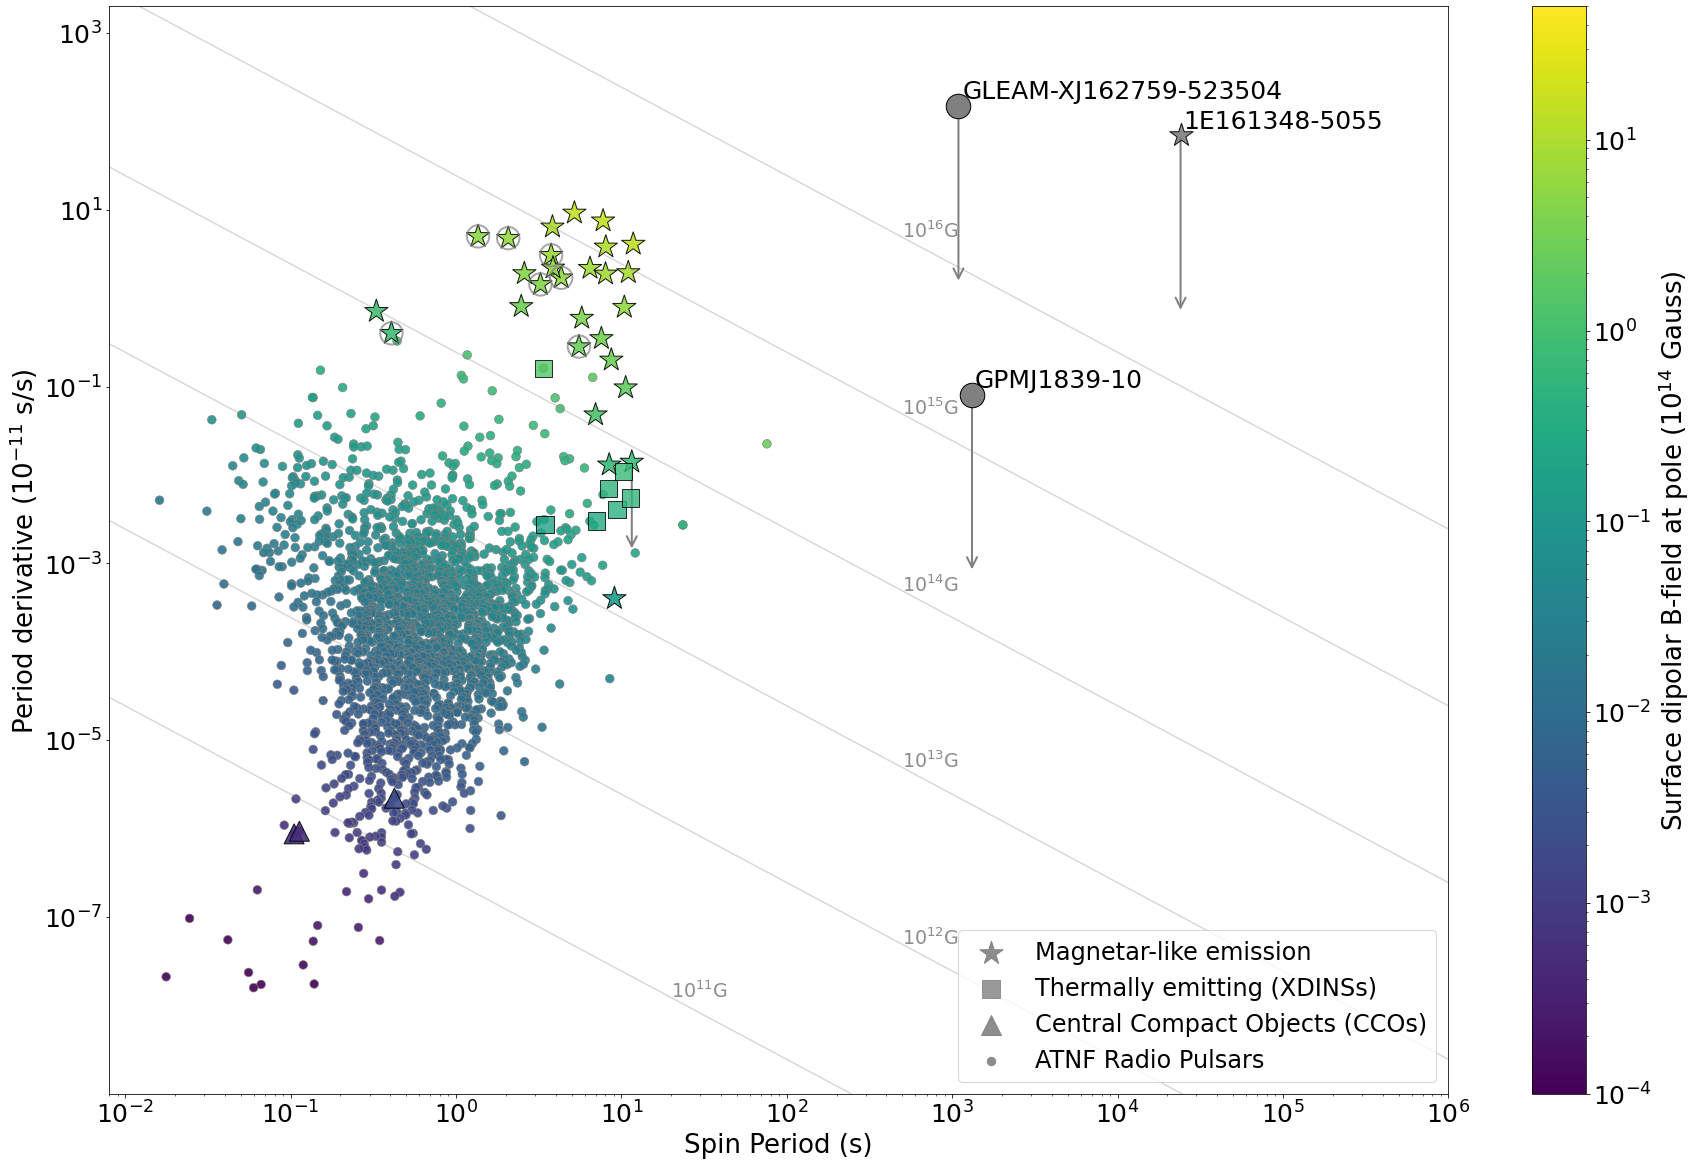

In [177]:
# Colorp MAP source data with P Pdot and B

plt.rcParams['figure.figsize'] = (30,20)
plt.rcParams.update({'font.size': 25})

from adjustText import adjust_text

my_cmap = "viridis"
texts = []
inside_text_size = 25

#cbar = plt.colorbar()


my_norm = colors.LogNorm(vmin=0.0001, vmax=50)


# Magnetars 
selection = (df_sources_data['class']=='Magnetar') 
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap,
            #color='grey',
            norm=my_norm,
            alpha=0.9, 
            marker='*',
            edgecolors='black',
            s=600,
            label='Magnetar-like emission')



#for index, row in df_sources_data[selection].iterrows():
#    texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
#                         row['source'], ha='center', va='center', color='black', size=inside_text_size))
    
for index, row in df_sources_data[selection].iterrows():
    
 
  # Plot radio magnetars
    if row['radio']==True:
        plt.scatter(row['period(s)'], row['pdot(1e-11s/s)'], 
                    s=500, facecolors='none', edgecolors='grey', linewidths=2, alpha=0.7)

  #  if row['radio']==True:    
  #      texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
  #                            row['source'], ha='center', va='center', color='black', size=inside_text_size))
                            
              
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['pdot(1e-11s/s)']/10), 
                    xytext=(row['period(s)'], row['pdot(1e-11s/s)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)
     
    
plt.clim(0.0001, 50)

sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=my_norm)
cbar = plt.colorbar(sm)
cbar.ax.set_ylabel(r'Surface dipolar B-field at pole ($10^{14}$ Gauss)', size=26)

    
"""

# Pulsars 
#selection = (((df_sources_data['class']=='RPP') | (df_sources_data['class']=='HB PSR')))
#plt.scatter(x=df_sources_data[selection]['period(s)'], 
#            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
#            c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap,
#            norm=matplotlib.colors.LogNorm(),
#            alpha=1, 
#            marker='X',
#            edgecolors='black',
#            s=160,
#            label='Rotation-powered')

#for index, row in df_sources_data[selection].iterrows():
#    texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
#                          row['source'], ha='center', va='center', color='black', size=inside_text_size))

    # Plot radio pulsars
    #if row['radio']==True:
    #    plt.scatter(row['period(s)'], row['pdot(1e-11s/s)'], 
    #                s=600, facecolors='none', edgecolors='grey', linewidths=2, alpha=0.7)
        
"""

 #XDINS 
selection = (df_sources_data['class']=='XDINS')
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
             marker='s',
            edgecolors='black',
             s=300,
             alpha=0.8, zorder=3,
             label='Thermally emitting (XDINSs)')


plt.clim(0.0001, 50)



#CCOs
selection = ((df_sources_data['class']=='CCO') & (~np.isnan(df_sources_data['Edot(e33erg/s)'])))
#selection = ((df_sources_data['class']=='CCO') & (~np.isnan(df_sources_data['source']=='1E161348-5055')))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
            alpha=0.9, 
            marker='^',
            edgecolors='black',
            s=400,
            #color='grey',
            label='Central Compact Objects (CCOs)')

        
plt.clim(0.0001, 50)



#RCW103
selection = ((df_sources_data['source']=='1E161348-5055'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            #c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
            alpha=0.9, 
            marker='*',
            edgecolors='black',
            s=600,
            color='grey',
            )


for index, row in df_sources_data[selection].iterrows():
    texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
                         row['source'], ha='center', va='center', color='black', size=inside_text_size))
#weight='bold'
 
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['pdot(1e-11s/s)']/100), 
                    xytext=(row['period(s)'], row['pdot(1e-11s/s)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)   
        
    

#LongP - GLEAM-XJ162759-523504 
selection = ((df_sources_data['source']=='PSRJ0250+5854') | (df_sources_data['source']=='PSRJ0901-4046'))
#selection = (df_sources_data['source']=='PSRJ0250+5854')
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
            marker='.', zorder=-3,
             edgecolors='grey',
             s=300,
             alpha=0.9, 
             linewidth=0.7)

#for index, row in df_sources_data[selection].iterrows():
#    texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
#                         row['source'], ha='center', va='center', color='black', size=inside_text_size))

 # Plot radio magnetars
 #   if row['radio']==True:
 #       plt.scatter(row['period(s)'], row['pdot(1e-11s/s)'], 
 #                   s=400, facecolors='none', edgecolors='grey', linewidths=2, alpha=0.7)
    
plt.clim(0.0001, 50)


        
#GLEAM-XJ162759-523504
selection = ((df_sources_data['source']=='GLEAM-XJ162759-523504'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            #c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=600,
            color='grey')


            
            
for index, row in df_sources_data[selection].iterrows():
    texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
                         row['source'], ha='center', va='center', color='black', size=inside_text_size))
#weight='bold'
 
    
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['pdot(1e-11s/s)']/100), 
                    xytext=(row['period(s)'], row['pdot(1e-11s/s)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)    
        
 # Plot radio magnetars
 #   if row['radio']==True:
 #       plt.scatter(row['period(s)'], row['pdot(1e-11s/s)'], 
 #                   s=300, facecolors='none', edgecolors='grey', linewidths=2, alpha=0.7)



#GMP J1839-10
selection = ((df_sources_data['source']=='GPMJ1839-10'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            #c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=600,
            color='grey')

for index, row in df_sources_data[selection].iterrows():
    texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
                         row['source'], ha='center', va='center', color='black', size=inside_text_size))
    #weight='bold'

 
    
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['pdot(1e-11s/s)']/100), 
                    xytext=(row['period(s)'], row['pdot(1e-11s/s)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)    
        

plt.clim(0.0001, 50)      


    


# ATNF pulsars
#selection = (~np.isnan(df_atnf_data['P0'!='*']) | (~np.isnan(df_atnf_data['P1'=*]) | (~np.isnan(df_atnf_data['BSURF'=*])
plt.scatter(x=df_atnf_data['P0'], 
            y=df_atnf_data['P1']/1.e-11, 
            c=df_atnf_data['BSURF']/0.5e14, cmap=my_cmap, 
            #color='grey',
             norm=my_norm,
             marker='.', zorder=-3,
             edgecolors='grey',
             s=300,
             alpha=0.9, 
             linewidth=0.7,
             label='ATNF Radio Pulsars')

plt.clim(0.0001, 50)


    

plt.xlabel(r'Spin Period (s)', size=26)
plt.ylabel(r'Period derivative ($10^{-11}$ s/s)', size=26)


plt.yscale('log')
plt.xscale('log')



plt.xlim(8e-3, 1.e6)
plt.ylim(1.001e-9, 2000)
plt.clim(0.0001, 50)


plt.legend(fontsize=24, loc='lower right')
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('grey')
leg.legendHandles[1].set_color('grey')
leg.legendHandles[2].set_color('grey')
leg.legendHandles[3].set_color('grey')
#leg.legendHandles[4].set_color('grey')
#plt.grid()

#adjust_text(texts, x, y, arrowprops=dict(arrowstyle="->", color='r', lw=0.5), autoalign='')
            #, only_move={'points':'y', 'text':'y'})
adjust_text(texts, only_move={'text':'x'})
#, arrowprops=dict(arrowstyle='->', color='lightgrey'))

#plot a linear function
#


x = np.linspace(1e-4,1e6,3000)

y1e11 = (10**11)**2/(x*1.e-11*(6.4*10**19)**2)
y1e12 = (10**12)**2/(x*1.e-11*(6.4*10**19)**2)
y3e12 = (3*10**12)**2/(x*1.e-11*(6.4*10**19)**2)
y1e13 = (10**13)**2/(x*1.e-11*(6.4*10**19)**2)
y3e13 = (3*10**13)**2/(x*1.e-11*(6.4*10**19)**2)
y1e14 = (10**14)**2/(x*1.e-11*(6.4*10**19)**2)
y3e14 = (3*10**14)**2/(x*1.e-11*(6.4*10**19)**2)
y1e15 = (10**15)**2/(x*1.e-11*(6.4*10**19)**2)
y3e15 = (3*10**15)**2/(x*1.e-11*(6.4*10**19)**2)
y1e16 = (1*10**16)**2/(x*1.e-11*(6.4*10**19)**2)


plt.plot(x,y1e11, 'grey', alpha=0.3)
plt.plot(x,y1e12, 'grey', alpha=0.3)
plt.plot(x,y1e13, 'grey', alpha=0.3)
plt.plot(x,y1e14, 'grey', alpha=0.3)
plt.plot(x,y1e15, 'grey', alpha=0.3)
plt.plot(x,y1e16, 'grey', alpha=0.3)

x500=500
x20=20

y11=(1*10**11)**2/(x20*1.e-11*(6.4*10**19)**2)
y12=(1*10**12)**2/(x500*1.e-11*(6.4*10**19)**2)
y13=(1*10**13)**2/(x500*1.e-11*(6.4*10**19)**2)
y14=(1*10**14)**2/(x500*1.e-11*(6.4*10**19)**2)
y15=(1*10**15)**2/(x500*1.e-11*(6.4*10**19)**2)
y16=(1*10**16)**2/(x500*1.e-11*(6.4*10**19)**2)
plt.text(x20, y11, '$10^{11}$G', color='grey', alpha=0.9, size=19)
plt.text(x500, y12, '$10^{12}$G', color='grey', alpha=0.9, size=19)
plt.text(x500, y13, '$10^{13}$G', color='grey', alpha=0.9, size=19)
plt.text(x500, y14, '$10^{14}$G', color='grey', alpha=0.9, size=19)
plt.text(x500, y15, '$10^{15}$G', color='grey', alpha=0.9, size=19)
plt.text(x500, y16, '$10^{16}$G', color='grey', alpha=0.9, size=19)



plt.show()
#plt.savefig('P_Pdot_classic.pdf')


In [ ]:
def first_dl_chen(P,R,M):
    R = np.ones(len(P))*R
    return (1/4)*(106.37 - 9.5*np.log10(R) + 7.5*np.log10(P))

In [ ]:
def second_dl_chen(P,R,M):
    R = np.ones(len(P))*R
    return (1/4)*(96.692 - 8.5*np.log10(R) + 6.5*np.log10(P))

In [ ]:
def third_dl_chen(P,R,M):
    R = np.ones(len(P))*R
    return (1/7)*(180.078 - 17*np.log10(R) + 13*np.log10(P))

In [ ]:
def fourth_dl_chen(P,R,M):
    R = np.ones(len(P))*R
    return (1/4)*(91.85 - 8*np.log10(R) + 6*np.log10(P))

In [ ]:
def third_dl_zhang_Pdot(P,R,M):
    R = np.ones(len(P))*R
    M = np.ones(len(P))*M
    return 21.32 - np.log10(M) + (5/2)*np.log10(P) - (1/2)*np.log10(R)
    

In [ ]:
def third_prime_dl_zhang_Pdot(P,R,M):
    R = np.ones(len(P))*R
    M = np.ones(len(P))*M
    return 16.47 - np.log10(M) + 2*np.log10(P)

## P Pdot with  death lines

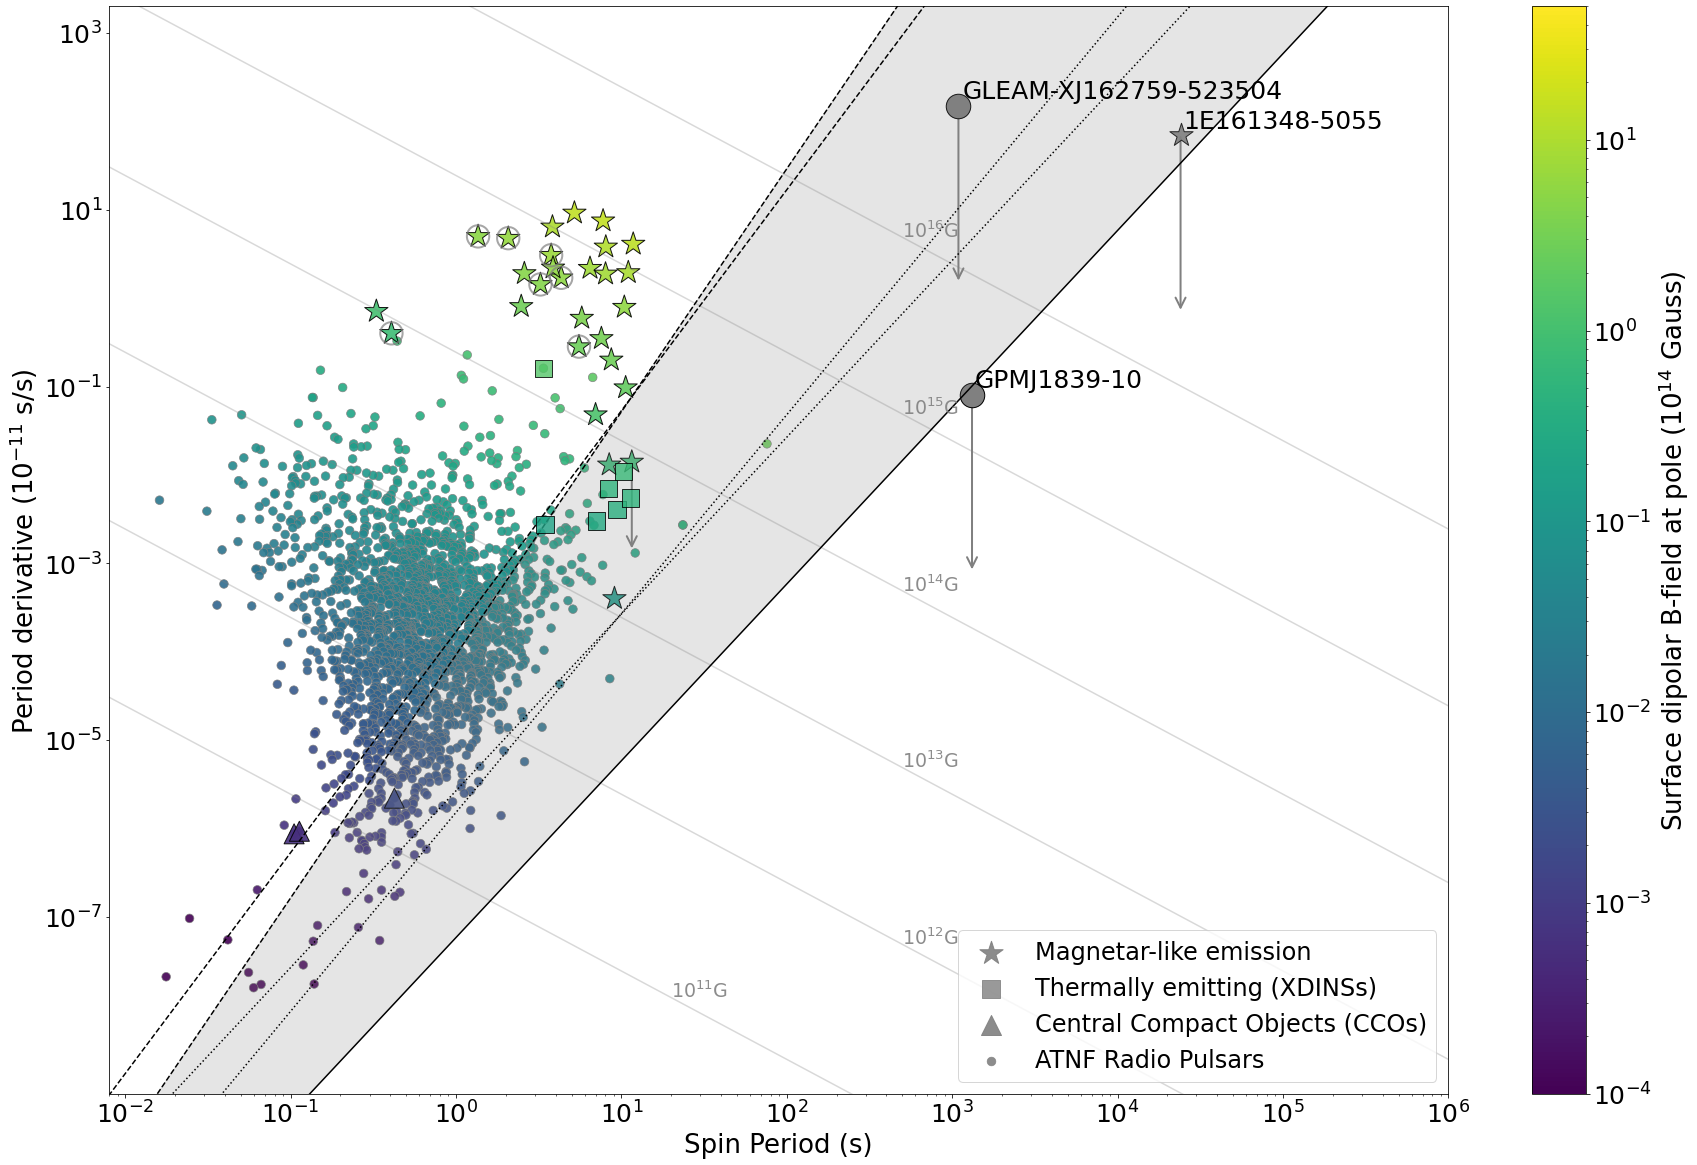

In [205]:
# Colorp MAP source data with P Pdot and B

plt.rcParams['figure.figsize'] = (30,20)
plt.rcParams.update({'font.size': 25})

from adjustText import adjust_text

my_cmap = "viridis"
texts = []
inside_text_size = 25


my_norm = colors.LogNorm(vmin=0.0001, vmax=50)


# Magnetars 
selection = (df_sources_data['class']=='Magnetar') 
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap,
            #color='grey',
            norm=my_norm,
            alpha=0.9, 
            marker='*',
            edgecolors='black',
            s=600,
            label='Magnetar-like emission')



#for index, row in df_sources_data[selection].iterrows():
#    texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
#                         row['source'], ha='center', va='center', color='black', size=inside_text_size))
    
for index, row in df_sources_data[selection].iterrows():
    
 
  # Plot radio magnetars
    if row['radio']==True:
        plt.scatter(row['period(s)'], row['pdot(1e-11s/s)'], 
                    s=500, facecolors='none', edgecolors='grey', linewidths=2, alpha=0.7)

  #  if row['radio']==True:    
  #      texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
  #                            row['source'], ha='center', va='center', color='black', size=inside_text_size))
                            
              
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['pdot(1e-11s/s)']/10), 
                    xytext=(row['period(s)'], row['pdot(1e-11s/s)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)
     
    
plt.clim(0.0001, 50)

sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=my_norm)
cbar = plt.colorbar(sm)
cbar.ax.set_ylabel(r'Surface dipolar B-field at pole ($10^{14}$ Gauss)', size=26)

    
"""

# Pulsars 
#selection = (((df_sources_data['class']=='RPP') | (df_sources_data['class']=='HB PSR')))
#plt.scatter(x=df_sources_data[selection]['period(s)'], 
#            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
#            c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap,
#            norm=matplotlib.colors.LogNorm(),
#            alpha=1, 
#            marker='X',
#            edgecolors='black',
#            s=160,
#            label='Rotation-powered')

#for index, row in df_sources_data[selection].iterrows():
#    texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
#                          row['source'], ha='center', va='center', color='black', size=inside_text_size))

    # Plot radio pulsars
    #if row['radio']==True:
    #    plt.scatter(row['period(s)'], row['pdot(1e-11s/s)'], 
    #                s=600, facecolors='none', edgecolors='grey', linewidths=2, alpha=0.7)
        
"""

 #XDINS 
selection = (df_sources_data['class']=='XDINS')
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
             marker='s',
            edgecolors='black',
             s=300,
             alpha=0.8, zorder=3,
             label='Thermally emitting (XDINSs)')


plt.clim(0.0001, 50)



#CCOs
selection = ((df_sources_data['class']=='CCO') & (~np.isnan(df_sources_data['Edot(e33erg/s)'])))
#selection = ((df_sources_data['class']=='CCO') & (~np.isnan(df_sources_data['source']=='1E161348-5055')))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
            alpha=0.9, 
            marker='^',
            edgecolors='black',
            s=400,
            #color='grey',
            label='Central Compact Objects (CCOs)')

        
plt.clim(0.0001, 50)



#RCW103
selection = ((df_sources_data['source']=='1E161348-5055'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            #c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
            alpha=0.9, 
            marker='*',
            edgecolors='black',
            s=600,
            color='grey',
            )


for index, row in df_sources_data[selection].iterrows():
    texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
                         row['source'], ha='center', va='center', color='black', size=inside_text_size))
#weight='bold'
 
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['pdot(1e-11s/s)']/100), 
                    xytext=(row['period(s)'], row['pdot(1e-11s/s)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)   
        
    

#LongP - GLEAM-XJ162759-523504 
selection = ((df_sources_data['source']=='PSRJ0250+5854') | (df_sources_data['source']=='PSRJ0901-4046'))
#selection = (df_sources_data['source']=='PSRJ0250+5854')
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
            marker='.', zorder=-3,
             edgecolors='grey',
             s=300,
             alpha=0.9, 
             linewidth=0.7)

#for index, row in df_sources_data[selection].iterrows():
#    texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
#                         row['source'], ha='center', va='center', color='black', size=inside_text_size))

 # Plot radio magnetars
 #   if row['radio']==True:
 #       plt.scatter(row['period(s)'], row['pdot(1e-11s/s)'], 
 #                   s=400, facecolors='none', edgecolors='grey', linewidths=2, alpha=0.7)
    
plt.clim(0.0001, 50)


        
#GLEAM-XJ162759-523504
selection = ((df_sources_data['source']=='GLEAM-XJ162759-523504'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            #c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=600,
            color='grey')


            
            
for index, row in df_sources_data[selection].iterrows():
    texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
                         row['source'], ha='center', va='center', color='black', size=inside_text_size))
#weight='bold'
 
    
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['pdot(1e-11s/s)']/100), 
                    xytext=(row['period(s)'], row['pdot(1e-11s/s)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)    
        
 # Plot radio magnetars
 #   if row['radio']==True:
 #       plt.scatter(row['period(s)'], row['pdot(1e-11s/s)'], 
 #                   s=300, facecolors='none', edgecolors='grey', linewidths=2, alpha=0.7)



#GMP J1839-10
selection = ((df_sources_data['source']=='GPMJ1839-10'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            #c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=600,
            color='grey')

for index, row in df_sources_data[selection].iterrows():
    texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
                         row['source'], ha='center', va='center', color='black', size=inside_text_size))
    #weight='bold'

 
    
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['pdot(1e-11s/s)']/100), 
                    xytext=(row['period(s)'], row['pdot(1e-11s/s)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)    
        

plt.clim(0.0001, 50)      


    


# ATNF pulsars
#selection = (~np.isnan(df_atnf_data['P0'!='*']) | (~np.isnan(df_atnf_data['P1'=*]) | (~np.isnan(df_atnf_data['BSURF'=*])
plt.scatter(x=df_atnf_data['P0'], 
            y=df_atnf_data['P1']/1.e-11, 
            c=df_atnf_data['BSURF']/0.5e14, cmap=my_cmap, 
            #color='grey',
             norm=my_norm,
             marker='.', zorder=-3,
             edgecolors='grey',
             s=300,
             alpha=0.9, 
             linewidth=0.7,
             label='ATNF Radio Pulsars')

plt.clim(0.0001, 50)


    

plt.xlabel(r'Spin Period (s)', size=26)
plt.ylabel(r'Period derivative ($10^{-11}$ s/s)', size=26)


plt.yscale('log')
plt.xscale('log')



plt.xlim(8e-3, 1.e6)
plt.ylim(1.001e-9, 2000)
plt.clim(0.0001, 50)


plt.legend(fontsize=24, loc='lower right')
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('grey')
leg.legendHandles[1].set_color('grey')
leg.legendHandles[2].set_color('grey')
leg.legendHandles[3].set_color('grey')
#leg.legendHandles[4].set_color('grey')
#plt.grid()

#adjust_text(texts, x, y, arrowprops=dict(arrowstyle="->", color='r', lw=0.5), autoalign='')
            #, only_move={'points':'y', 'text':'y'})
adjust_text(texts, only_move={'text':'x'})
#, arrowprops=dict(arrowstyle='->', color='lightgrey'))

#plot a linear function
#


x = np.linspace(1e-4,1e6,3000)

y1e11 = (10**11)**2/(x*1.e-11*(6.4*10**19)**2)
y1e12 = (10**12)**2/(x*1.e-11*(6.4*10**19)**2)
y3e12 = (3*10**12)**2/(x*1.e-11*(6.4*10**19)**2)
y1e13 = (10**13)**2/(x*1.e-11*(6.4*10**19)**2)
y3e13 = (3*10**13)**2/(x*1.e-11*(6.4*10**19)**2)
y1e14 = (10**14)**2/(x*1.e-11*(6.4*10**19)**2)
y3e14 = (3*10**14)**2/(x*1.e-11*(6.4*10**19)**2)
y1e15 = (10**15)**2/(x*1.e-11*(6.4*10**19)**2)
y3e15 = (3*10**15)**2/(x*1.e-11*(6.4*10**19)**2)
y1e16 = (1*10**16)**2/(x*1.e-11*(6.4*10**19)**2)


plt.plot(x,y1e11, 'grey', alpha=0.3)
plt.plot(x,y1e12, 'grey', alpha=0.3)
plt.plot(x,y1e13, 'grey', alpha=0.3)
plt.plot(x,y1e14, 'grey', alpha=0.3)
plt.plot(x,y1e15, 'grey', alpha=0.3)
plt.plot(x,y1e16, 'grey', alpha=0.3)

x500=500
x20=20

y11=(1*10**11)**2/(x20*1.e-11*(6.4*10**19)**2)
y12=(1*10**12)**2/(x500*1.e-11*(6.4*10**19)**2)
y13=(1*10**13)**2/(x500*1.e-11*(6.4*10**19)**2)
y14=(1*10**14)**2/(x500*1.e-11*(6.4*10**19)**2)
y15=(1*10**15)**2/(x500*1.e-11*(6.4*10**19)**2)
y16=(1*10**16)**2/(x500*1.e-11*(6.4*10**19)**2)
plt.text(x20, y11, '$10^{11}$G', color='grey', alpha=0.9, size=19)
plt.text(x500, y12, '$10^{12}$G', color='grey', alpha=0.9, size=19)
plt.text(x500, y13, '$10^{13}$G', color='grey', alpha=0.9, size=19)
plt.text(x500, y14, '$10^{14}$G', color='grey', alpha=0.9, size=19)
plt.text(x500, y15, '$10^{15}$G', color='grey', alpha=0.9, size=19)
plt.text(x500, y16, '$10^{16}$G', color='grey', alpha=0.9, size=19)



# DEATH LINES

R_NS6 = 1.2
R_NS = 1.2*1.e6
Msolar = 2*1.e33
M_NS = 1.4*Msolar
K = 4 * (3 * light_c_cgs**3) * 2 / (5 * 8 * math.pi**2)


x = np.linspace(1e-3,1e7,6000)


# Chen 1 Pure Dipole

chen1_ppdot_pd = 1/K * ((2.2*1.e12 * (R_NS6)**(-19/8) * x**(15/8))**2) * (R_NS)**4 / M_NS  / x
plt.plot(x,chen1_ppdot_pd/1.e-11, linestyle='dashed', color='black', markersize=12, alpha=1)
#x11=2.2e3
#y11 = 1/K * ((2.2*1.e12 * (R_NS6)**(-19/8) * x11**(15/8))**2) * (R_NS)**4 / M_NS  / x11 / 1.e-11
#plt.text(x11, y11*1.5, 'Pure dipole', color='black', alpha=1, rotation=39, size=34)


# Chen 2 Twisted dipole

chen2_ppdot_twd = 1/K * ((2.7*1.e11 * (R_NS6)**(-17/8) * x**(13/8))**2) * (R_NS)**4 / M_NS  / x
plt.plot(x,chen2_ppdot_twd/1.e-11, linestyle='dotted', color='black', markersize=12, alpha=1)


# Chen 4 Twisted Multipolar Spot beta=10
beta = 10
chen4_ppdot_tw_multi = 1/K * ((9.2*1.e10 * beta**(-1/4) * (R_NS6)**(-2) * x**(3/2))**2) * (R_NS)**4 / M_NS  / x
plt.plot(x,chen4_ppdot_tw_multi/1.e-11, linestyle='solid', color='black', markersize=12, alpha=1)



# Zhang III 

zhangIII_ppdot = 1/K * ((9.2*1.e25 * (R_NS)**(-9/4) * x**(7/4))**2) * (R_NS)**4 / M_NS  / x
plt.plot(x,zhangIII_ppdot/1.e-11, linestyle='dashed', color='black', markersize=12, alpha=1)


# Zhang III prime

zhangIIIprime_ppdot = 1/K * ((3.5*1.e23 * (R_NS)**(-2) * x**(3/2))**2) * (R_NS)**4 / M_NS  / x
plt.plot(x,zhangIIIprime_ppdot/1.e-11, linestyle='dotted', color='black', markersize=12, alpha=1)




plt.fill_between(x, chen1_ppdot_pd/1.e-11, chen4_ppdot_tw_multi/1.e-11, color='grey', alpha=0.2)


plt.savefig('P_Pdot_GPM1839_deathlines.pdf')


--- [START] Adjusting text ---
--- [FINISH] Adjusting text ---


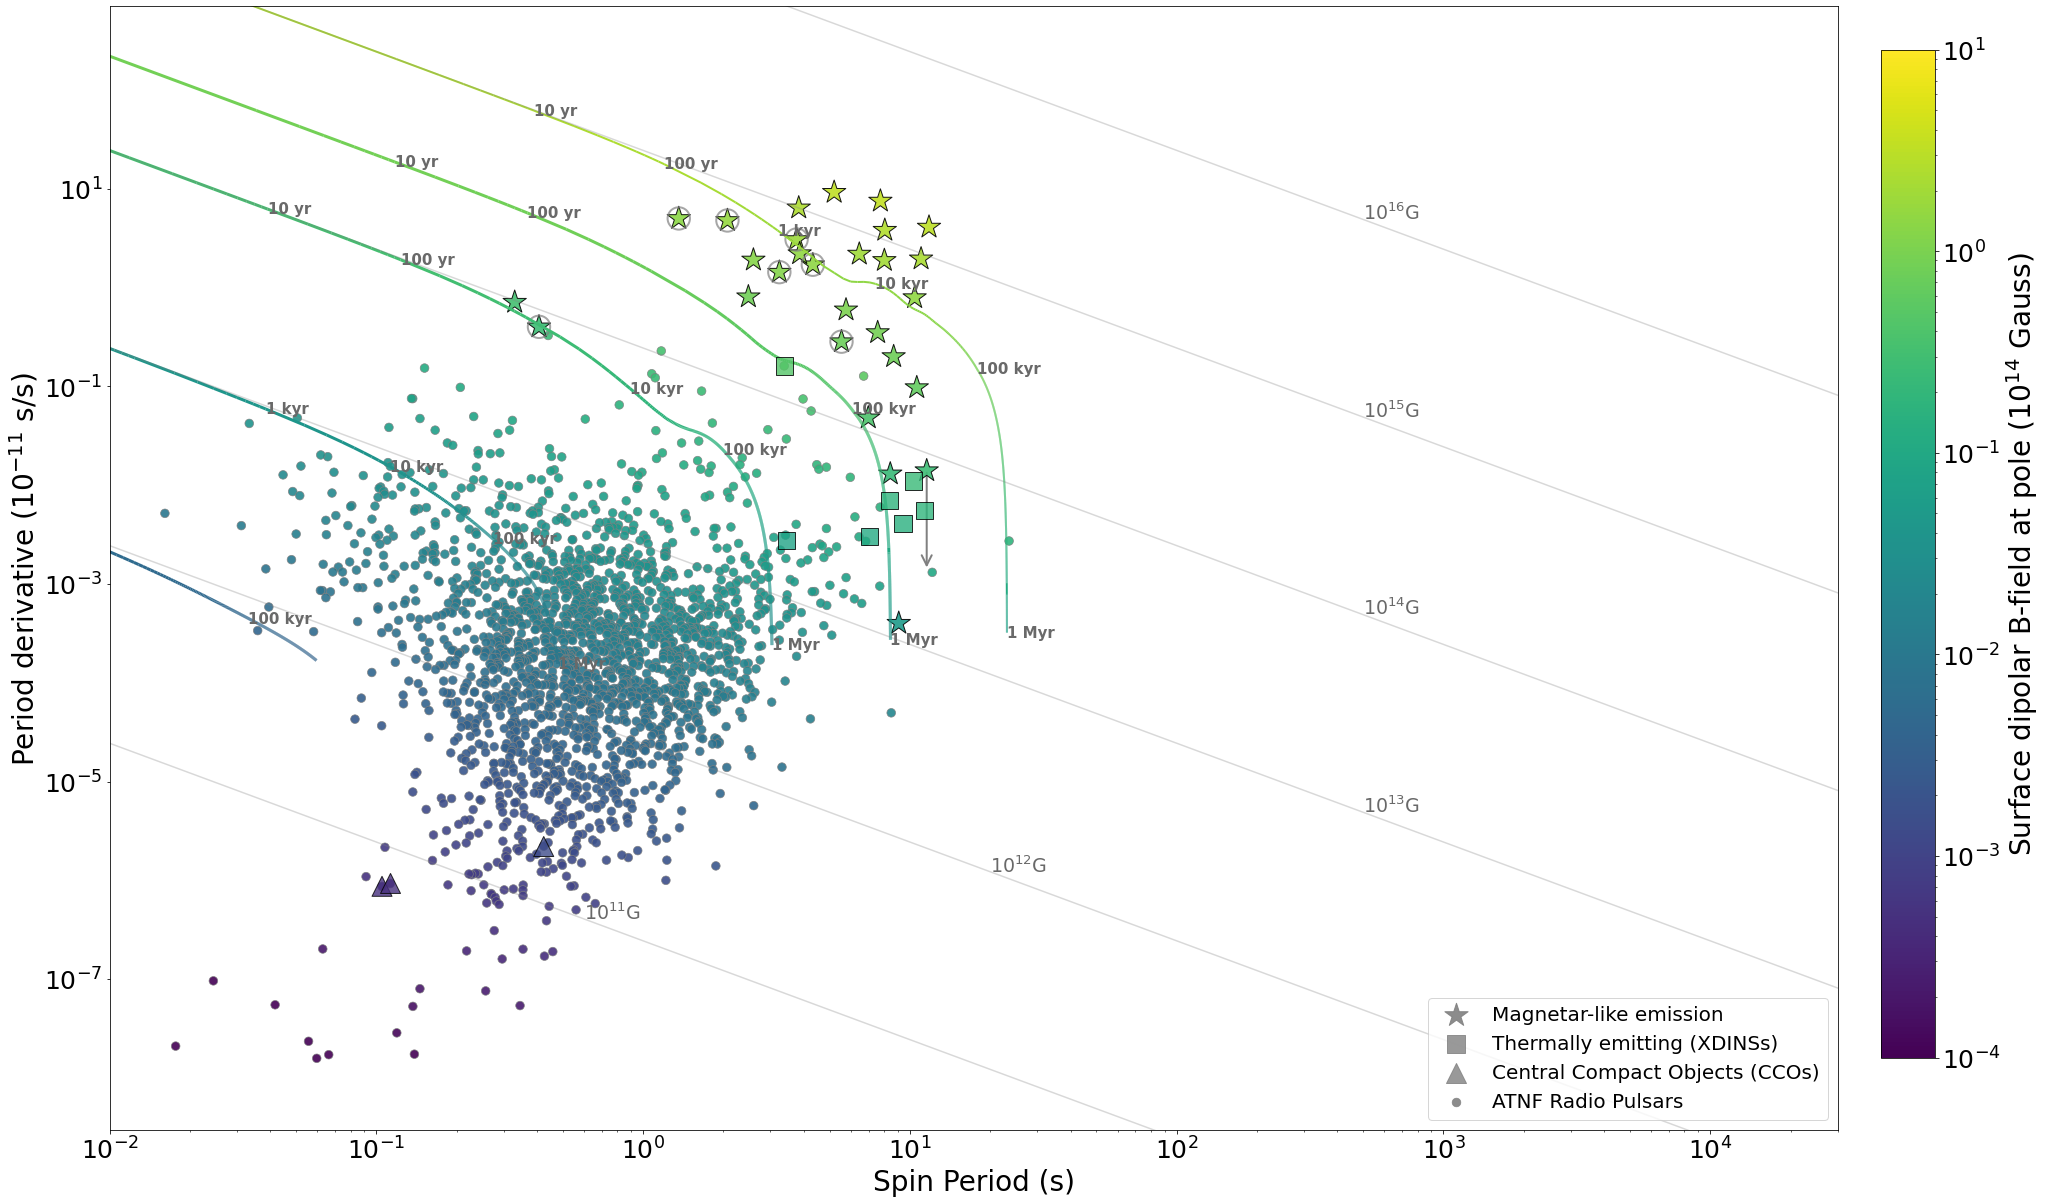

In [157]:
# Colorp MAP source data with P Pdot and B


# Colorp MAP source data with B, P, L
plt.rcParams.update({'font.size': 25})
plt.rcParams['figure.figsize'] = (30,20)

from adjustText import adjust_text

my_cmap = "viridis"
texts = []
inside_text_size = 24

# Create the figure and arrange a grid |temp|temp|ppdot|luminosity|.
fig = plt.figure(figsize=(30, 20))
#plt.subplots_adjust(left=0.1, right=0.95, bottom=0.12, top=0.85)
plt.subplots_adjust(left=0.1, bottom=0.1, right=None, top=None, wspace=0.4, hspace=0.4)
fig.subplots_adjust(hspace=0.1, wspace=0.2)
spec_ = matplotlib.gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
ax_ = fig.add_subplot(spec_[0, 0])

ax_.set_xscale('log')
ax_.set_yscale('log')
ax_.set_xlim([0.01, 30000])
ax_.set_ylim([3.001e-9, 700])
ax_.set_ylabel(r'Period derivative ($10^{-11}$ s/s)', size=28)
ax_.set_xlabel(r'Spin Period (s)', size=28)
ax_.grid(False)

my_norm = matplotlib.colors.LogNorm(0.0001, 50)

# Magnetars 
selection = (df_sources_data['class']=='Magnetar') 
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap,
            #color='grey',
            norm=my_norm,
            alpha=0.9, 
            marker='*',
            edgecolors='black',
            s=600,
            label='Magnetar-like emission')



for index, row in df_sources_data[selection].iterrows():
    
  # Plot radio magnetars
    if row['radio']==True:
        plt.scatter(row['period(s)'], row['pdot(1e-11s/s)'], 
                    s=500, facecolors='none', edgecolors='grey', linewidths=2, alpha=0.7)

  #  if row['radio']==True:    
  #      texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
  #                            row['source'], ha='center', va='center', color='black', size=inside_text_size))
                            
              
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['pdot(1e-11s/s)']/10), 
                    xytext=(row['period(s)'], row['pdot(1e-11s/s)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)

  

 

 #XDINS 
selection = (df_sources_data['class']=='XDINS')
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
             marker='s',
            edgecolors='black',
             s=300,
             alpha=0.8, zorder=3,
             label='Thermally emitting (XDINSs)')

 
#CCOs
selection = ((df_sources_data['class']=='CCO') & (~np.isnan(df_sources_data['Edot(e33erg/s)'])))
#selection = ((df_sources_data['class']=='CCO') & (~np.isnan(df_sources_data['source']=='1E161348-5055')))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
            alpha=0.8, 
            marker='^',
            edgecolors='black',
            s=400,
            #color='grey',
            label='Central Compact Objects (CCOs)')

"""  
#RCW103
selection = ((df_sources_data['source']=='1E161348-5055'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            #c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
            alpha=0.8, 
            marker='*',
            edgecolors='black',
            s=600,
            color='grey',
            )



for index, row in df_sources_data[selection].iterrows():
    texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
                         row['source'], ha='center', va='center', color='black', size=inside_text_size))

 
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['pdot(1e-11s/s)']/100), 
                    xytext=(row['period(s)'], row['pdot(1e-11s/s)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)   
        
        



#LongP - GLEAM-XJ162759-523504 
selection = ((df_sources_data['source']=='PSRJ0250+5854') | (df_sources_data['source']=='PSRJ0901-4046'))
#selection = (df_sources_data['source']=='PSRJ0250+5854')
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
            alpha=1, 
            marker='.',
            edgecolors='black',
            s=500,
            #color='grey',
            label='Long Period Pulsars')


for index, row in df_sources_data[selection].iterrows():
    texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
                         row['source'], ha='center', va='center', color='black', size=inside_text_size))


#GLEAM-XJ162759-523504
selection = ((df_sources_data['source']=='GLEAM-XJ162759-523504'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            #c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=400,
            color='grey')

for index, row in df_sources_data[selection].iterrows():
    texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
                         row['source'], ha='center', va='center', color='black', size=inside_text_size))

    
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['pdot(1e-11s/s)']/100), 
                    xytext=(row['period(s)'], row['pdot(1e-11s/s)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)    
        
     
  
#GMP J1839-10
selection = ((df_sources_data['source']=='GPMJ1839-10'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            #c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=400,
            color='grey')

for index, row in df_sources_data[selection].iterrows():
    texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
                         row['source'], ha='center', va='center', color='black', size=inside_text_size))

 
    
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['pdot(1e-11s/s)']/100), 
                    xytext=(row['period(s)'], row['pdot(1e-11s/s)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)    
  
"""

# ATNF pulsars
#selection = (~np.isnan(df_atnf_data['BINARY'=*])
plt.scatter(x=df_atnf_data['P0'], 
            y=df_atnf_data['P1']/1.e-11, 
            c=df_atnf_data['BSURF']/0.5e14, cmap=my_cmap, 
            #color='grey',
             norm=my_norm,
             marker='.', zorder=-3,
             edgecolors='grey',
             s=300,
             alpha=0.9, 
             linewidth=0.7,
             label='ATNF Radio Pulsars')

# Load all models

par_x= 'P_vacObs[s]'
par_y = 'Pdot_vacObs[s/s]'
par_c = 'B[G]'

#data1 = pd.read_csv('csv/cool_curve_Bpol_1e12_Etor_40_Btor_1e13_BtorAverage_1.5e11.csv') 
data1 = pd.read_csv('csv_Gud_NoNuSyn/cool_curve_CC_Bdip1e12_Btor1e13_no_nuSyn_Gudmundsson.csv')
x = data1[par_x] 
y = data1[par_y]/1.e-11
c = data1[par_c]/1e14
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = my_norm
lc = LineCollection(segments, cmap=my_cmap, norm=norm)
# Set the values used for colormapping
lc.set_array(c)
lc.set_linewidth(3)
ax_.add_collection(lc)


#data2 = pd.read_csv('csv/cool_curve_Bpol_1e13_Etor_40_Btor_1e14_BtorAverage_1.5e12.csv')
data2 = pd.read_csv('csv_Gud_NoNuSyn/cool_curve_CC_Bdip1e13_Btor1e14_no_nuSyn_Gudmundsson.csv')
x = data2[par_x] 
y = data2[par_y]/1.e-11
c = data2[par_c]/1e14
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = my_norm
lc = LineCollection(segments, cmap=my_cmap, norm=norm)
# Set the values used for colormapping
lc.set_array(c)
lc.set_linewidth(3)
ax_.add_collection(lc)


#data3 = pd.read_csv('csv/cool_curve_Bpol_1e14_Etor_40_Btor_9e14_BtorAverage_1.3e13.csv')
data3 = pd.read_csv('csv_Gud_NoNuSyn/cool_curve_CC_Bdip1e14_Btor1e15_no_nuSyn_Gudmundsson.csv')
x = data3[par_x] 
y = data3[par_y]/1.e-11
c = data3[par_c]/1e14
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm =my_norm
lc = LineCollection(segments, cmap=my_cmap, norm=norm)
# Set the values used for colormapping
lc.set_array(c)
lc.set_linewidth(3)
ax_.add_collection(lc)


#data4 = pd.read_csv('csv/cool_curve_Bpol_1e15_Etor_40_Btor_1e16_BtorAverage_1.5e14.csv')
data4 = pd.read_csv('csv_Gud_NoNuSyn/cool_curve_CC_Bdip3e14_Btor1e15_no_nuSyn_Gudmundsson.csv')
x = data4[par_x] 
y = data4[par_y]/1.e-11
c = data4[par_c]/1e14
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = my_norm
lc = LineCollection(segments, cmap=my_cmap, norm=norm)
# Set the values used for colormapping
lc.set_array(c)
lc.set_linewidth(3)
ax_.add_collection(lc)

#data5 = pd.read_csv('csv/cool_curve_Bpol_3e15_Etor_40_Btor_3e16_BtorAverage_4.4e14.csv')
data5 = pd.read_csv('csv_Gud_NoNuSyn/cool_curve_CC_Bdip1e15_Btor5e15_no_nuSyn_Gudmundsson.csv')
x = data5[par_x] 
y = data5[par_y]/1.e-11
c = data5[par_c]/1e14
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = my_norm
lc = LineCollection(segments, cmap=my_cmap, norm=norm)
# Set the values used for colormapping
lc.set_array(c)
lc.set_linewidth(2)
ax_.add_collection(lc)


#plot Constant B-values as linear function

x = np.linspace(1e-4,1e5,3000)

y1e11 = (10**11)**2/(x*1.e-11*(6.4*10**19)**2)
y1e12 = (10**12)**2/(x*1.e-11*(6.4*10**19)**2)
y3e12 = (3*10**12)**2/(x*1.e-11*(6.4*10**19)**2)
y1e13 = (10**13)**2/(x*1.e-11*(6.4*10**19)**2)
y3e13 = (3*10**13)**2/(x*1.e-11*(6.4*10**19)**2)
y1e14 = (10**14)**2/(x*1.e-11*(6.4*10**19)**2)
y3e14 = (3*10**14)**2/(x*1.e-11*(6.4*10**19)**2)
y1e15 = (10**15)**2/(x*1.e-11*(6.4*10**19)**2)
y3e15 = (3*10**15)**2/(x*1.e-11*(6.4*10**19)**2)
y1e16 = (1*10**16)**2/(x*1.e-11*(6.4*10**19)**2)

plt.plot(x,y1e11, 'grey', alpha=0.3)
plt.plot(x,y1e12, 'grey', alpha=0.3)
plt.plot(x,y1e13, 'grey', alpha=0.3)
plt.plot(x,y1e14, 'grey', alpha=0.3)
plt.plot(x,y1e15, 'grey', alpha=0.3)
plt.plot(x,y1e16, 'grey', alpha=0.3)

x500=500
x20=20
x06=0.6

#plot Label B-values 

y11=(1*10**11)**2/(x06*1.e-11*(6.4*10**19)**2)
y12=(1*10**12)**2/(x20*1.e-11*(6.4*10**19)**2)
y13=(1*10**13)**2/(x500*1.e-11*(6.4*10**19)**2)
y14=(1*10**14)**2/(x500*1.e-11*(6.4*10**19)**2)
y15=(1*10**15)**2/(x500*1.e-11*(6.4*10**19)**2)
y16=(1*10**16)**2/(x500*1.e-11*(6.4*10**19)**2)
plt.text(x06, y11, '$10^{11}$G', color='dimgrey', alpha=1, size=19)
plt.text(x20, y12, '$10^{12}$G', color='dimgrey', alpha=1, size=19)
plt.text(x500, y13, '$10^{13}$G', color='dimgrey', alpha=1, size=19)
plt.text(x500, y14, '$10^{14}$G', color='dimgrey', alpha=1, size=19)
plt.text(x500, y15, '$10^{15}$G', color='dimgrey', alpha=1, size=19)
plt.text(x500, y16, '$10^{16}$G', color='dimgrey', alpha=1, size=19)


#plot Times on cooling curves

data1_times = data1[data1['t[yr]'].isin(np.logspace(1,6,6))]
#label_x1 = data1_times.iloc[0]['P_vacObs[s]']
#label_y1 = data1_times.iloc[0]['Pdot_vacObs[s/s]']/1.e-11
#plt.text(label_x1, label_y1, "10 yr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
#label_x1 = data1_times.iloc[1]['P_vacObs[s]']
#label_y1 = data1_times.iloc[1]['Pdot_vacObs[s/s]']/1.e-11
#plt.text(label_x1, label_y1, "100 yr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
#label_x1 = data1_times.iloc[2]['P_vacObs[s]']
#label_y1 = data1_times.iloc[2]['Pdot_vacObs[s/s]']/1.e-11
#plt.text(label_x1, label_y1, "1 kyr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
#label_x1 = data1_times.iloc[3]['P_vacObs[s]']
#label_y1 = data1_times.iloc[3]['Pdot_vacObs[s/s]']/1.e-11
#plt.text(label_x1, label_y1, "10 kyr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
label_x1 = data1_times.iloc[4]['P_vacObs[s]']
label_y1 = data1_times.iloc[4]['Pdot_vacObs[s/s]']/1.e-11
plt.text(label_x1, label_y1, "100 kyr", ha='left', va='center', color='dimgrey', size=15, weight='bold')


data2_times = data2[data2['t[yr]'].isin(np.logspace(1,6,6))]
#label_x2 = data2_times.iloc[0]['P_vacObs[s]']
#label_y2 = data2_times.iloc[0]['Pdot_vacObs[s/s]']/1.e-11
#plt.text(label_x2, label_y2, "10 yr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
#label_x2 = data2_times.iloc[1]['P_vacObs[s]']
#label_y2 = data2_times.iloc[1]['Pdot_vacObs[s/s]']/1.e-11
#plt.text(label_x2, label_y2, "100 yr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
label_x2 = data2_times.iloc[2]['P_vacObs[s]']
label_y2 = data2_times.iloc[2]['Pdot_vacObs[s/s]']/1.e-11
plt.text(label_x2, label_y2, "1 kyr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
label_x2 = data2_times.iloc[3]['P_vacObs[s]']
label_y2 = data2_times.iloc[3]['Pdot_vacObs[s/s]']/1.e-11
plt.text(label_x2, label_y2, "10 kyr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
label_x2 = data2_times.iloc[4]['P_vacObs[s]']
label_y2 = data2_times.iloc[4]['Pdot_vacObs[s/s]']/1.e-11
plt.text(label_x2, label_y2, "100 kyr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
label_x2 = data2_times.iloc[5]['P_vacObs[s]']
label_y2 = data2_times.iloc[5]['Pdot_vacObs[s/s]']/1.e-11
plt.text(label_x2, label_y2, "1 Myr", ha='left', va='center', color='dimgrey', size=15, weight='bold')


data3_times = data3[data3['t[yr]'].isin(np.logspace(1,6,6))]
label_x3 = data3_times.iloc[0]['P_vacObs[s]']
label_y3 = data3_times.iloc[0]['Pdot_vacObs[s/s]']/1.e-11
plt.text(label_x3, label_y3, "10 yr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
label_x3 = data3_times.iloc[1]['P_vacObs[s]']
label_y3 = data3_times.iloc[1]['Pdot_vacObs[s/s]']/1.e-11
plt.text(label_x3, label_y3, "100 yr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
#label_x3 = data3_times.iloc[2]['P_vacObs[s]']
#label_y3 = data3_times.iloc[2]['Pdot_vacObs[s/s]']/1.e-11
#plt.text(label_x3, label_y3, "1 kyr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
label_x3 = data3_times.iloc[3]['P_vacObs[s]']
label_y3 = data3_times.iloc[3]['Pdot_vacObs[s/s]']/1.e-11
plt.text(label_x3, label_y3, "10 kyr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
label_x3 = data3_times.iloc[4]['P_vacObs[s]']
label_y3 = data3_times.iloc[4]['Pdot_vacObs[s/s]']/1.e-11
plt.text(label_x3, label_y3, "100 kyr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
label_x3 = data3_times.iloc[5]['P_vacObs[s]']
label_y3 = data3_times.iloc[5]['Pdot_vacObs[s/s]']/1.e-11
plt.text(label_x3, label_y3, "1 Myr", ha='left', va='center', color='dimgrey', size=15, weight='bold')


data4_times = data4[data4['t[yr]'].isin(np.logspace(1,6,6))]
label_x4 = data4_times.iloc[0]['P_vacObs[s]']
label_y4 = data4_times.iloc[0]['Pdot_vacObs[s/s]']/1.e-11
plt.text(label_x4, label_y4, "10 yr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
label_x4 = data4_times.iloc[1]['P_vacObs[s]']
label_y4 = data4_times.iloc[1]['Pdot_vacObs[s/s]']/1.e-11
plt.text(label_x4, label_y4, "100 yr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
#label_x4 = data4_times.iloc[2]['P_vacObs[s]']
#label_y4 = data4_times.iloc[2]['Pdot_vacObs[s/s]']/1.e-11
#plt.text(label_x4, label_y4, "1 kyr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
#label_x4 = data4_times.iloc[3]['P_vacObs[s]']
#label_y4 = data4_times.iloc[3]['Pdot_vacObs[s/s]']/1.e-11
#plt.text(label_x4, label_y4, "10 kyr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
label_x4 = data4_times.iloc[4]['P_vacObs[s]']
label_y4 = data4_times.iloc[4]['Pdot_vacObs[s/s]']/1.e-11
plt.text(label_x4, label_y4, "100 kyr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
label_x4 = data4_times.iloc[5]['P_vacObs[s]']
label_y4 = data4_times.iloc[5]['Pdot_vacObs[s/s]']/1.e-11
plt.text(label_x4, label_y4, "1 Myr", ha='left', va='center', color='dimgrey', size=15, weight='bold')


data5_times = data5[data5['t[yr]'].isin(np.logspace(1,6,6))]
label_x5 = data5_times.iloc[0]['P_vacObs[s]']
label_y5 = data5_times.iloc[0]['Pdot_vacObs[s/s]']/1.e-11
plt.text(label_x5, label_y5, "10 yr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
label_x5 = data5_times.iloc[1]['P_vacObs[s]']
label_y5 = data5_times.iloc[1]['Pdot_vacObs[s/s]']/1.e-11
plt.text(label_x5, label_y5, "100 yr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
label_x5 = data5_times.iloc[2]['P_vacObs[s]']
label_y5 = data5_times.iloc[2]['Pdot_vacObs[s/s]']/1.e-11
plt.text(label_x5, label_y5, "1 kyr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
label_x5 = data5_times.iloc[3]['P_vacObs[s]']
label_y5 = data5_times.iloc[3]['Pdot_vacObs[s/s]']/1.e-11
plt.text(label_x5, label_y5, "10 kyr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
label_x5 = data5_times.iloc[4]['P_vacObs[s]']
label_y5 = data5_times.iloc[4]['Pdot_vacObs[s/s]']/1.e-11
plt.text(label_x5, label_y5, "100 kyr", ha='left', va='center', color='dimgrey', size=15, weight='bold')
label_x5 = data5_times.iloc[5]['P_vacObs[s]']
label_y5 = data5_times.iloc[5]['Pdot_vacObs[s/s]']/1.e-11
plt.text(label_x5, label_y5, "1 Myr", ha='left', va='center', color='dimgrey', size=15, weight='bold')


# x = np.linspace(1e-4,1e5,1000)

# y1e11 = (10**11)**2/(x*(6.4*10**19)**2)
# y1e11 = (10**11)**2/(x*(6.4*10**19)**2)
# y1e12 = (10**12)**2/(x*(6.4*10**19)**2)
# y3e12 = (3*10**12)**2/(x*(6.4*10**19)**2)
# y1e13 = (10**13)**2/(x*(6.4*10**19)**2)
# y3e13 = (3*10**13)**2/(x*(6.4*10**19)**2)
# y1e14 = (10**14)**2/(x*(6.4*10**19)**2)
# y3e14 = (3*10**14)**2/(x*(6.4*10**19)**2)
# y1e15 = (10**15)**2/(x*(6.4*10**19)**2)
# y3e15 = (3*10**15)**2/(x*(6.4*10**19)**2)


# ax_.plot(x,y1e12, 'grey')
# ax_.plot(x,y3e12, 'grey')
# ax_.plot(x,y1e13, 'grey')
# ax_.plot(x,y3e13, 'grey')
# ax_.plot(x,y1e14, 'grey')
# ax_.plot(x,y3e14, 'grey')
# ax_.plot(x,y1e15, 'grey')
# ax_.plot(x,y3e15, 'grey')


# Create the legend by default
#leg = ax_.legend(loc='lower right',fontsize=28) 


plt.legend(fontsize=20, loc='lower right')
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('grey')
leg.legendHandles[1].set_color('grey')
leg.legendHandles[2].set_color('grey')
leg.legendHandles[3].set_color('grey')
#leg.legendHandles[4].set_color('grey')



# Creat a new fully white colormap
#white = np.ones((1, 4))
#white_cmp = ListedColormap(white)

# Change colormap for each entry of the legend
#for h in leg.legendHandles:
#    h.set_cmap(white_cmp)

# Text Adjust
print("--- [START] Adjusting text ---")
adjust_text(texts, only_move={'text':'y'})
print("--- [FINISH] Adjusting text ---")


# Colorbar
# Manual input of MIN and MAX
cbar_min = 0.0001
cbar_max = 10 #50

# Colormap, Logaritmic normalization and ScalarMappable
cbar_cmap = matplotlib.cm.viridis
cbar_norm = matplotlib.colors.LogNorm(vmin=cbar_min, vmax=cbar_max)
mappable = matplotlib.cm.ScalarMappable(norm=cbar_norm, cmap=cbar_cmap)

# Creation of new Axes for the Colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.025, 0.7])  # (Dimensions [left, bottom, width, height] of the colorbar Axes)


# Creation of the Colorbar
cbar = fig.colorbar(mappable, cax=cbar_ax)
cbar.set_label('Surface dipolar B-field at pole ($10^{14}$ Gauss)', size=28)


#label_x2 = df_times_heavy.iloc[1]['P']
#label_y2 = df_times_heavy.iloc[1]['L']*1.7/1e33
#plt.text(label_x2, label_y2, "10$^2$ yr", marker='*', ha='left', va='center', color='grey', size=13, weight='bold')


#plt.show()
plt.savefig('P_Pdot_classic_models.pdf')

# B-fields and death-lines PULSARS 1sigma

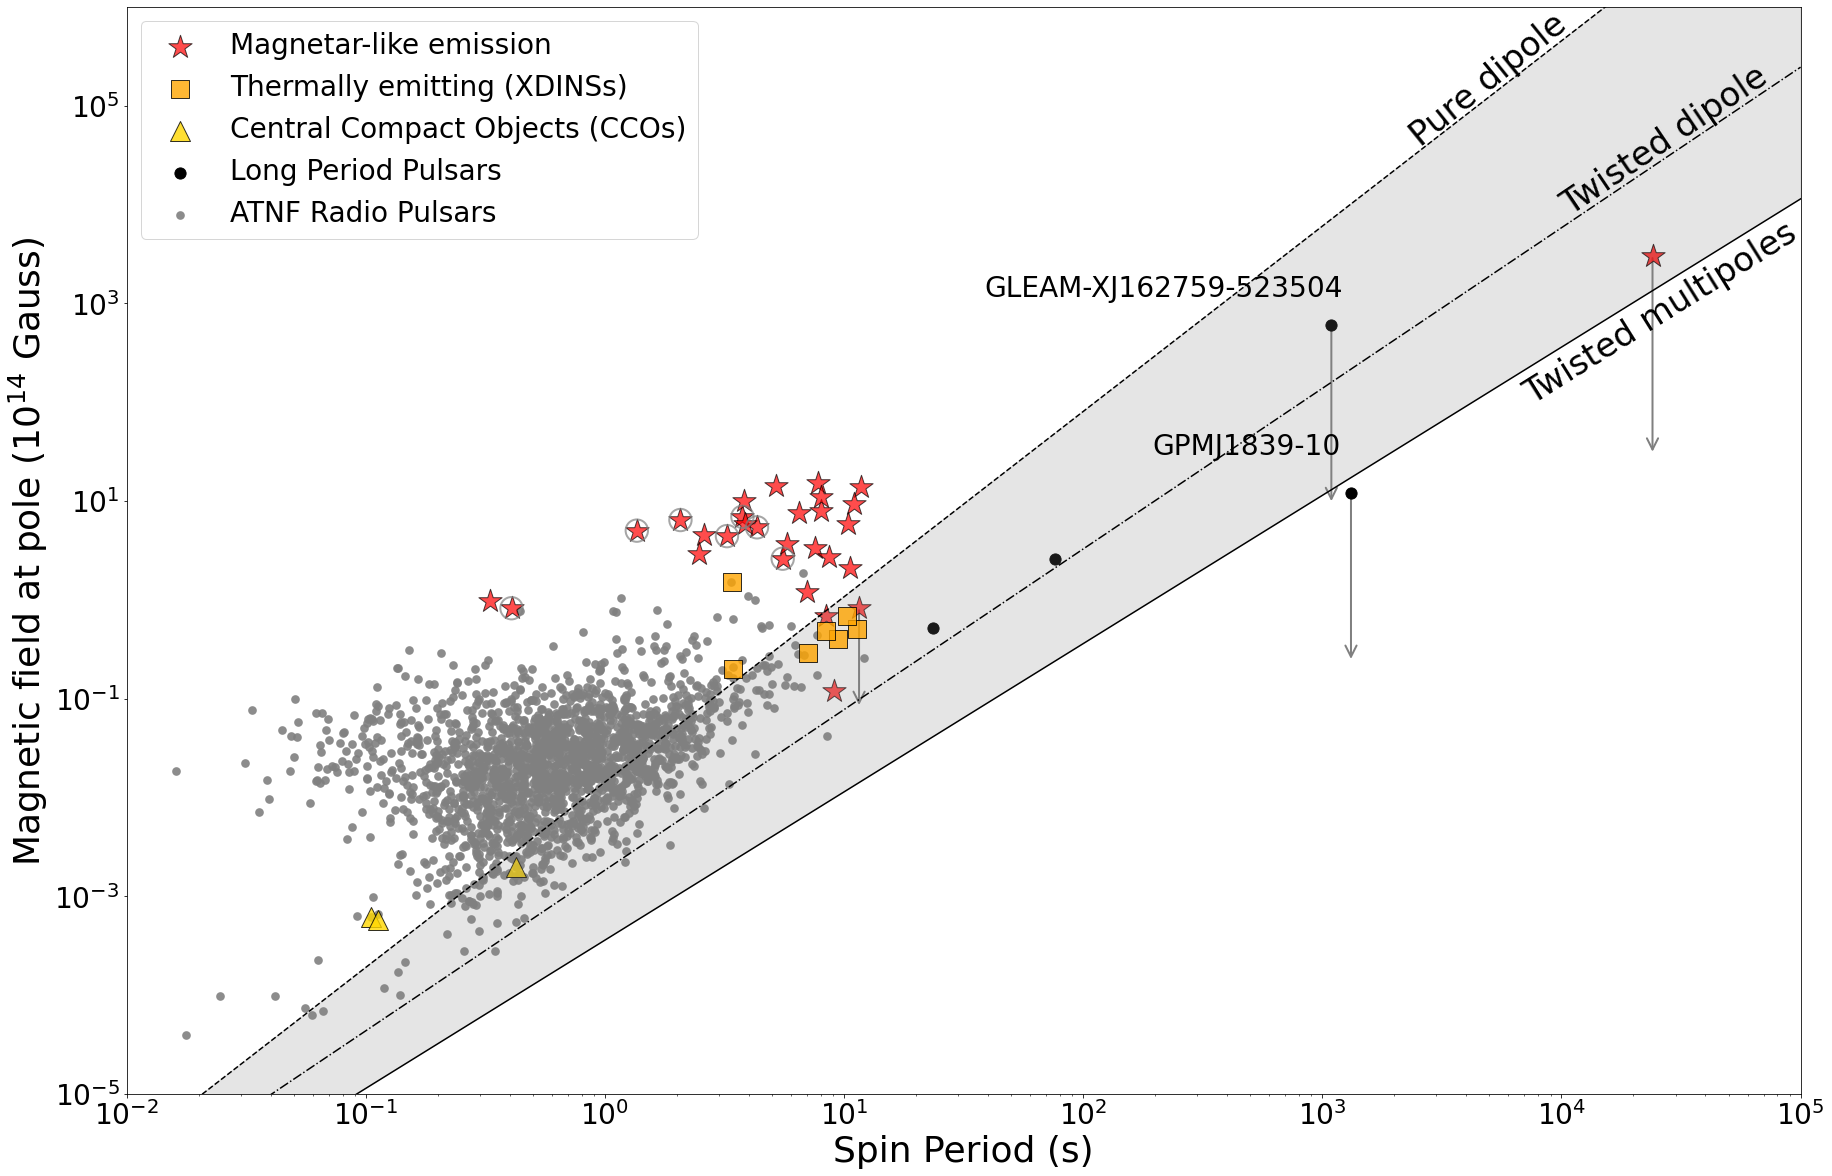

In [161]:
# Colorp MAP source data with P Pdot and B

plt.rcParams['figure.figsize'] = (30,20)
plt.rcParams.update({'font.size': 28})

from adjustText import adjust_text

#my_cmap = "viridis"
texts = []
inside_text_size = 28

#cbar = plt.colorbar()
from matplotlib import colors

my_norm = colors.LogNorm(vmin=0.0001, vmax=50)


# Magnetars 
selection = (df_sources_data['class']=='Magnetar') 
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)'],
            color='red',
            alpha=0.7, 
            marker='*',
            edgecolors='black',
            s=600,
            label='Magnetar-like emission')


    
#for index, row in df_sources_data[selection].iterrows():
#    if row['source']=='SwiftJ1818.0-1607':
#        texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
#                              row['source'], ha='center', va='center', color='black', size=inside_text_size))
#                               size=16, weight='bold'                                       
#    else:
#        texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
#                              row['source'], ha='center', va='center', color='black', size=inside_text_size))
       


for index, row in df_sources_data[selection].iterrows():
    
 
  # Plot radio magnetars
    if row['radio']==True:
        plt.scatter(row['period(s)'], row['Bp(e14G)'], 
                    s=500, facecolors='none', edgecolors='grey', linewidths=2, alpha=0.7)

  #  if row['radio']==True:    
  #      texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
  #                            row['source'], ha='center', va='center', color='black', size=inside_text_size))
                            
              
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['Bp(e14G)']/10), 
                    xytext=(row['period(s)'], row['Bp(e14G)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)
     
    

# Pulsars 
#selection = (((df_sources_data['class']=='RPP') | (df_sources_data['class']=='HB PSR')))
#plt.scatter(x=df_sources_data[selection]['period(s)'], 
#            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
#            c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap,
#            norm=matplotlib.colors.LogNorm(),
#            alpha=1, 
#            marker='X',
#            edgecolors='black',
#            s=160,
#            label='Rotation-powered')

#for index, row in df_sources_data[selection].iterrows():
#    texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
#                          row['source'], ha='center', va='center', color='black', size=inside_text_size))

    # Plot radio pulsars
    #if row['radio']==True:
    #    plt.scatter(row['period(s)'], row['pdot(1e-11s/s)'], 
    #                s=600, facecolors='none', edgecolors='grey', linewidths=2, alpha=0.7)
        
 

 #XDINS 
selection = (df_sources_data['class']=='XDINS')
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)'], 
            color='orange',
             marker='s',
            edgecolors='black',
             s=300,
             alpha=0.8, zorder=3,
             label='Thermally emitting (XDINSs)')


#CCOs
selection = ((df_sources_data['class']=='CCO') & (~np.isnan(df_sources_data['Edot(e33erg/s)'])))
#selection = ((df_sources_data['class']=='CCO') & (~np.isnan(df_sources_data['source']=='1E161348-5055')))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)'],
            color='gold',
            alpha=0.8, 
            marker='^',
            edgecolors='black',
            s=400,
            #color='grey',
            label='Central Compact Objects (CCOs)')



#RCW103
selection = ((df_sources_data['source']=='1E161348-5055'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)'],
            alpha=0.8, 
            marker='*',
            edgecolors='black',
            s=600,
            color='red',
            )


for index, row in df_sources_data[selection].iterrows():
    
#    texts.append(plt.text(row['period(s)'], row['Bp(e14G)'], 
#                         row['source'], ha='center', va='center', color='black', size=inside_text_size))
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['Bp(e14G)']/100), 
                    xytext=(row['period(s)'], row['Bp(e14G)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)   
        
        

#LongP - GLEAM-XJ162759-523504 
selection = ((df_sources_data['source']=='PSRJ0250+5854') | (df_sources_data['source']=='PSRJ0901-4046'))
#selection = (df_sources_data['source']=='PSRJ0250+5854')
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)'], 
            alpha=1, 
            marker='.',
            edgecolors='black',
            s=500,
            color='black',
            label='Long Period Pulsars')

#for index, row in df_sources_data[selection].iterrows():
#    texts.append(plt.text(row['period(s)'], row['Bp(e14G)'], 
#                         row['source'], ha='center', va='center', color='black', size=inside_text_size))

 # Plot radio magnetars
 #   if row['radio']==True:
 #       plt.scatter(row['period(s)'], row['pdot(1e-11s/s)'], 
 #                   s=400, facecolors='none', edgecolors='grey', linewidths=2, alpha=0.7)
    


#GLEAM-XJ162759-523504
selection = ((df_sources_data['source']=='GLEAM-XJ162759-523504'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)']*0.63, 
            norm=my_norm,
            alpha=1, 
            marker='.',
            edgecolors='black',
            s=500,
            color='black')

for index, row in df_sources_data[selection].iterrows():
    texts.append(plt.text(row['period(s)']/30, row['Bp(e14G)'], 
                         row['source'], ha='center', va='center', color='black', size=inside_text_size))

 
    
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['Bp(e14G)']/100), 
                    xytext=(row['period(s)'], row['Bp(e14G)']*0.63),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)    
        
 # Plot radio magnetars
 #   if row['radio']==True:
 #       plt.scatter(row['period(s)'], row['pdot(1e-11s/s)'], 
 #                   s=300, facecolors='none', edgecolors='grey', linewidths=2, alpha=0.7)

    
    
#GMP J1839-10
selection = ((df_sources_data['source']=='GPMJ1839-10'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)']/2, 
            norm=my_norm,
            alpha=1, 
            marker='.',
            edgecolors='black',
            s=500,
            color='black')

for index, row in df_sources_data[selection].iterrows():
    texts.append(plt.text(row['period(s)']/7, row['Bp(e14G)'], 
                         row['source'], ha='center', va='center', color='black', size=inside_text_size))

 
    
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['Bp(e14G)']/100), 
                    xytext=(row['period(s)'], row['Bp(e14G)']/2),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)    
        

    
# ATNF pulsars
#selection = (~np.isnan(df_atnf_data['BINARY'=*])
plt.scatter(x=df_atnf_data['P0'], 
            y=df_atnf_data['BSURF']/0.5e14, 
            color='grey',
             marker='.', zorder=-3,
             edgecolors='grey',
             s=300,
             alpha=0.9, 
             linewidth=0,
             label='ATNF Radio Pulsars')

plt.xlabel(r'Spin Period (s)', size=36)
plt.ylabel(r'Magnetic field at pole ($10^{14}$ Gauss)', size=36)


plt.yscale('log')
plt.xscale('log')


plt.xlim(0.01, 1.e5)
plt.ylim(0.00001, 1.e6)


plt.legend(fontsize=28, loc='upper left')
ax = plt.gca()
leg = ax.get_legend()
#leg.legendHandles[0].set_color('grey')
#leg.legendHandles[1].set_color('grey')
#leg.legendHandles[2].set_color('grey')
#leg.legendHandles[3].set_color('grey')
#leg.legendHandles[4].set_color('grey')
#plt.grid()

#adjust_text(texts, x, y, arrowprops=dict(arrowstyle="->", color='r', lw=0.5), autoalign='')
            #, only_move={'points':'y', 'text':'y'})
adjust_text(texts, only_move={'text':'x'})
#, arrowprops=dict(arrowstyle='->', color='lightgrey'))

#plot a linear function
#


#x00= 2.e2
#y00=0.00002
#plt.text(x00, y00, 'ISOLATED PULSAR POPULATION', color='black', alpha=1, size=32, ha='left')


#DEATH LINES

x = np.linspace(1e-3,1e5,3000)

y1pd = 2.2*1.e12 * (1.2)**(-19/8) * x**(15/8)/1.e14
plt.plot(x,y1pd, linestyle='dashed', color='black', markersize=12, alpha=1)
x11=2.2e3
y11 = 2.2*1.e12 * (1.2)**(-19/8) * x11**(15/8)/1.e14
plt.text(x11, y11*1.5, 'Pure dipole', color='black', alpha=1, rotation=39, size=34)

y1twd = 2.7*1.e11 * (1.2)**(-17/8) * x**(13/8)/1.e14
plt.plot(x,y1twd, linestyle='dashdot', color='black', markersize=12, alpha=1)
x22=9500
y22 = 2.2*1.e11 * (1.2)**(-17/8) * x22**(13/8)/1.e14
plt.text(x22, y22*1.8, 'Twisted dipole', color='black', alpha=1, rotation=34, size=34)


beta = 10
y1tw_multi = 9.2*1.e10 * beta**(-1/4) * (1.2)**(-2) * x**(3/2)/1.e14
plt.plot(x,y1tw_multi, linestyle='solid', color='black', markersize=12, alpha=1)
x44=6600
y44 = 9.2*1.e10 * beta**(-1/4) * (1.2)**(-2) * x44**(3/2)/1.e14
plt.text(x44, y44*0.5, 'Twisted multipoles', color='black', alpha=1, rotation=32, size=34)

#0.11674*1.e10


plt.fill_between(x, y1pd, y1tw_multi, color='grey', alpha=0.2)



""" 
y2_zhang_dip = 0.35*1.e11 * (1.2)**(5/2) * (1.2)**(1/2) * x**(3/2)/1.e14
plt.plot(x,y2_zhang_dip, linestyle='solid', color='black', markersize=12, alpha=1)
x55=6600
y55 = 0.11674*1.e10 * (1.2)**(5/2) * (1.2)**(1/2) * x55**(3/2)/1.e14
plt.text(x55, y55*0.5, 'Zhang', color='black', alpha=1, rotation=32, size=34)
"""


"""
beta = 10
y1spot = 2.7*1.e11 * beta**(-1/8) * (1.2)**(-17/8) * x**(13/8)/1.e14
plt.plot(x,y1spot, linestyle='dotted', color='black', markersize=12, alpha=1)
x33=22000
y33 = 2.7*1.e11 * beta**(-1/8) * (1.2)**(-17/8) * x33**(13/8)/1.e14
plt.text(x33, y33*0.6, 'Star-spot', color='black', alpha=1, rotation=34, size=34)"""

#Electron critical b-field 
#y_Bcr=0.43
#plt.plot(x,y_Bcr, linestyle='solid', color='grey', markersize=12, alpha=0.6)



#plt.text(x06, y11, '$10^{11}$G', color='dimgrey', alpha=1, size=19)



#plot Times on cooling curves



#plt.show()
plt.savefig('P_B_death_lines_NSs.pdf')
#plt.savefig('P_B_NSs.pdf')

In [162]:
df_wd_data = pd.read_csv('MagneticWhiteDwarfs_B_rot_mass2.csv')
#df_data['delta_lum'] = df_data['lumin_peak'] / df_data['luminosity_bol_qui(e33erg/s)']
#df_data['mag_pow'] = df_data['Bp(e14G)'] * df_data['Bp(e14G)'] / (8*3.141592653589793)
df_wd_data.to_csv('MagneticWhiteDwarfs_B_rot_mass2.csv', index=False)
df_wd_data

,Type,WDname,Teff(K),Mass,B(MG),Err_B(MG),P_rot(d),dP_rot(d)(low),dP_rot(d)(high)
0,AR Sco,AR Sco,NaN,NaN,500.0000,NaN,0.001368,NaN,NaN
1,WD,0003-103,19420,1.08,1.4700,NaN,2.110000,0.045,0.045
2,WD,0009+501,6540,0.74,0.3380,0.07,0.334000,0.008,0.008
3,WD,0041-102,20000,1.1,35.0000,NaN,0.091393,0.000007,0.000007
4,WD,0253+508,15000,0.57,13.0000,1,0.157917,0.00208,0.00208
5,WD,0257+080,6680,0.53,0.1000,NaN,0.868750,0.49375,5.13125
6,WD,0322-019,5310,0.64,0.1200,NaN,29.850000,1.85,3.15
7,WD,0325-857,30000,1.39,317.5000,132.5,0.008400,0.000000011,0.000000011
8,WD,0410-114,7440,0.42,3.1000,NaN,0.015278,0.000347,0.000347
9,WD,0548-001,6200,0.7,7.3000,0.3,0.174040,0.00021,0.00021


# Death lines for WDs

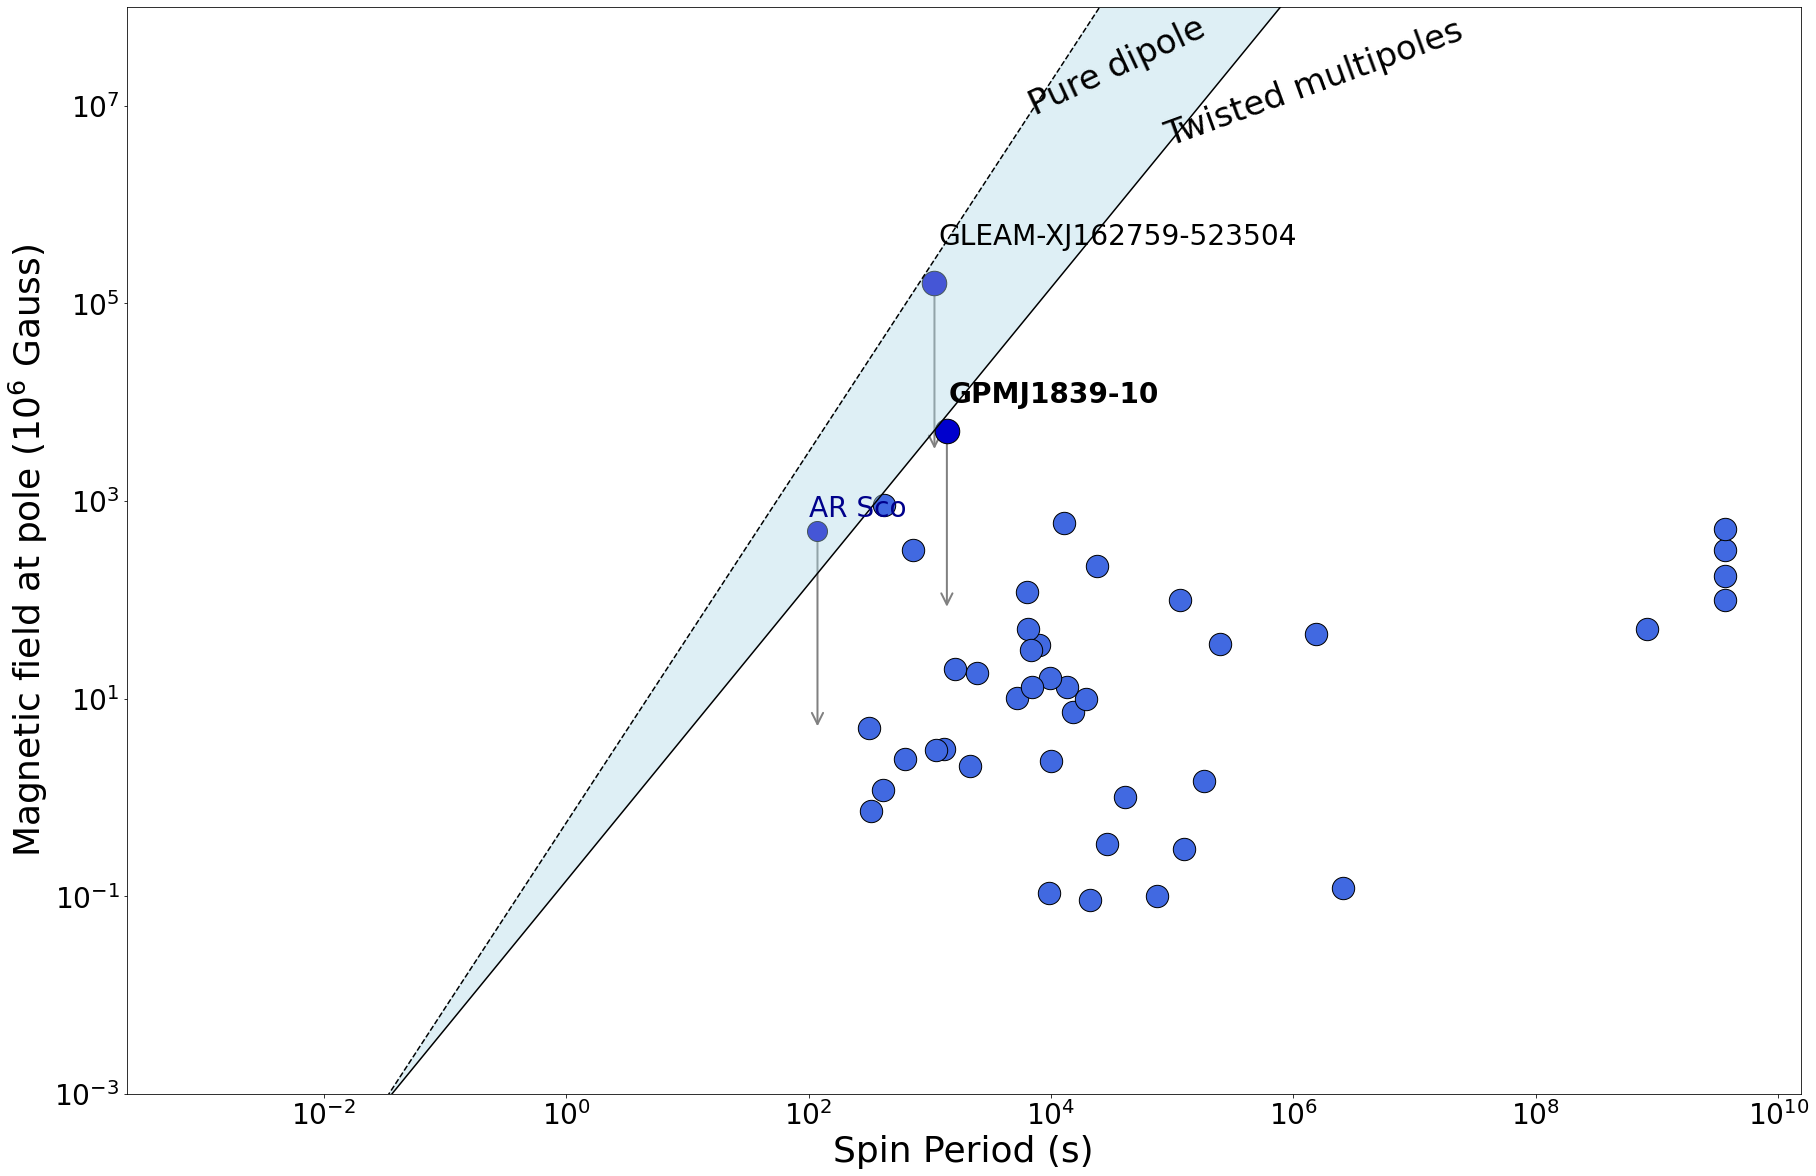

In [163]:
# Colorp MAP source data with P Pdot and B

plt.rcParams['figure.figsize'] = (30,20)
plt.rcParams.update({'font.size': 28})

from adjustText import adjust_text

#my_cmap = "viridis"
texts = []
inside_text_size = 28

#cbar = plt.colorbar()
from matplotlib import colors

        

        
#WD B-fields    
    
selection = ((df_wd_data['Type']=='WD'))
plt.scatter(x=df_wd_data[selection]['P_rot(d)']*86400, 
            y=df_wd_data[selection]['B(MG)'], 
            alpha=1,
            marker='o',
            edgecolors='black',
            s=500,
            color='royalblue')

    
    
    
# WD pulsar assumption for AR Sco
selection = ((df_wd_data['WDname']=='AR Sco'))
plt.scatter(x=df_wd_data[selection]['P_rot(d)']*86400, 
            y=df_wd_data[selection]['B(MG)'], 
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=400,
            color='mediumblue')

for index, row in df_wd_data[selection].iterrows():
#    texts.append(plt.text(row['P_rot(d)']*86400, row['B(MG)']/1.e8, 
#                         row['WDname'], ha='center', va='center', color='mediumblue', size=inside_text_size))

    # Plot B upperlimits
    if row['Type']=='AR Sco':
        plt.annotate("", xy=(row['P_rot(d)']*86400, row['B(MG)']/100), 
                    xytext=(row['P_rot(d)']*86400, row['B(MG)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)   
        
        
    
# WD assumption GLEAM-XJ162759-523504
selection = ((df_wd_data['WDname']=='GLEAM-XJ162759-523504'))
plt.scatter(x=df_wd_data[selection]['P_rot(d)']*86400, 
            y=df_wd_data[selection]['B(MG)']/2, 
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=600,
            color='mediumblue')


for index, row in df_wd_data[selection].iterrows():
    texts.append(plt.text(row['P_rot(d)']*86400, row['B(MG)'], 
                         row['WDname'], ha='center', va='center', color='black', size=inside_text_size))
 

    # Plot B upperlimits
    if row['Type']=='LongP':
        plt.annotate("", xy=(row['P_rot(d)']*86400, row['B(MG)']/100), 
                    xytext=(row['P_rot(d)']*86400, row['B(MG)']/2),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)    
        
        

        
        
    
    
# WD assumption GMP J1839-10
selection = ((df_wd_data['WDname']=='GPMJ1839-10'))
plt.scatter(x=df_wd_data[selection]['P_rot(d)']*86400, 
            y=df_wd_data[selection]['B(MG)']*0.63, 
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=600,
            color='mediumblue')


for index, row in df_wd_data[selection].iterrows():
    texts.append(plt.text(row['P_rot(d)']*86400, row['B(MG)'], 
                         row['WDname'], ha='center', va='center', color='black', weight='bold', size=inside_text_size))
 

    # Plot B upperlimits
    if row['Type']=='LongP':
        plt.annotate("", xy=(row['P_rot(d)']*86400, row['B(MG)']/100), 
                    xytext=(row['P_rot(d)']*86400, row['B(MG)']*0.63),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)    
        

plt.xlabel(r'Spin Period (s)', size=36)
plt.ylabel(r'Magnetic field at pole ($10^{6}$ Gauss)', size=36)



plt.yscale('log')
plt.xscale('log')


#plt.xlim(50, 1.e6)
plt.ylim(0.001, 1.e8)


#plt.legend(fontsize=24, loc='upper left')
#ax = plt.gca()
#leg = ax.get_legend()
#leg.legendHandles[0].set_color('grey')
#leg.legendHandles[1].set_color('grey')
#leg.legendHandles[2].set_color('grey')
#leg.legendHandles[3].set_color('grey')
#leg.legendHandles[4].set_color('grey')
#plt.grid()

#adjust_text(texts, x, y, arrowprops=dict(arrowstyle="->", color='r', lw=0.5), autoalign='')
            #, only_move={'points':'y', 'text':'y'})
adjust_text(texts, only_move={'text':'y'})
#, arrowprops=dict(arrowstyle='->', color='lightgrey'))

plt.text(100, 700, 'AR Sco', color='darkblue', alpha=1, size=28)

#plot a linear function
#

#x0= 2.e4
#y0=0.002
#plt.text(x0, y0, 'ISOLATED MAGNETIC WHITE DWARFS', color='royalblue', alpha=1, size=32, ha='left')

x = np.linspace(1e-3,1e9,3000)


#Pure dipole
y1pd_wd = 2.2*1.e12 * (600)**(-19/8) * x**(15/8)/1.e6
plt.plot(x,y1pd_wd, linestyle='dashed', color='black', markersize=12, alpha=1)
x1=6e3
y1 = 2.2*1.e12 * (600)**(-19/8) * x1**(15/8)/1.e6
plt.text(x1, y1*1.2, 'Pure dipole', color='black', alpha=1, rotation=25, size=34)


#Pure twisted multipoles
beta = 10
y1tw_multi_wd = 9.2*1.e10 * beta**(-1/4) * (600)**(-2) * x**(3/2)/1.e6
plt.plot(x,y1tw_multi_wd, linestyle='solid', color='black', markersize=12, alpha=1)
x2=8.e4
y2 =9.2*1.e10 * beta**(-1/4) * (600)**(-2) * x2**(3/2)/1.e6
plt.text(x2, y2*1.2, 'Twisted multipoles', color='black', alpha=1, rotation=20, size=34)


plt.fill_between(x, y1pd_wd, y1tw_multi_wd, color='lightblue', alpha=0.4)


#plt.show()
plt.savefig('P_B_data_WD_gpm1839_death_lines_1sigma.pdf')

# Death lines for NS and WD together 3sigma

In [101]:

plt.rcParams['figure.figsize'] = (30,30)
plt.rcParams.update({'font.size': 28})

from adjustText import adjust_text

#my_cmap = "viridis"
texts = []
inside_text_size = 28

#cbar = plt.colorbar()
from matplotlib import colors

#my_norm = colors.LogNorm(vmin=0.0001, vmax=50)


# Magnetars 
selection = (df_sources_data['class']=='Magnetar') 
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)'],
            color='red',
            alpha=0.7, 
            marker='*',
            edgecolors='black',
            s=600,
            label='Magnetar-like emission')

   
#for index, row in df_sources_data[selection].iterrows():
#    if row['source']=='SwiftJ1818.0-1607':
#        texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
#                              row['source'], ha='center', va='center', color='black', size=inside_text_size))
#                               size=16, weight='bold'                                       
#    else:
#        texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
#                              row['source'], ha='center', va='center', color='black', size=inside_text_size))
       


for index, row in df_sources_data[selection].iterrows():    
 
  # Plot radio magnetars
    if row['radio']==True:
        plt.scatter(row['period(s)'], row['Bp(e14G)'], 
                    s=500, facecolors='none', edgecolors='grey', linewidths=2, alpha=0.7)

  #  if row['radio']==True:    
  #      texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
  #                            row['source'], ha='center', va='center', color='black', size=inside_text_size))
                                         
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['Bp(e14G)']/10), 
                    xytext=(row['period(s)'], row['Bp(e14G)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)
     
    

#XDINS 
selection = (df_sources_data['class']=='XDINS')
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)'], 
            color='orange',
             marker='s',
            edgecolors='black',
             s=300,
             alpha=0.8, zorder=3,
             label='Thermally emitting (XDINSs)')


#CCOs
selection = ((df_sources_data['class']=='CCO') & (~np.isnan(df_sources_data['Edot(e33erg/s)'])))
#selection = ((df_sources_data['class']=='CCO') & (~np.isnan(df_sources_data['source']=='1E161348-5055')))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)'],
            color='gold',
            alpha=0.8, 
            marker='^',
            edgecolors='black',
            s=400,
            #color='grey',
            label='Central Compact Objects (CCOs)')



#RCW103
selection = ((df_sources_data['source']=='1E161348-5055'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)'],
            alpha=0.8, 
            marker='*',
            edgecolors='black',
            s=600,
            color='red',
            )


for index, row in df_sources_data[selection].iterrows():  
#    texts.append(plt.text(row['period(s)'], row['Bp(e14G)'], 
#                         row['source'], ha='center', va='center', color='black', size=inside_text_size))
    
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['Bp(e14G)']/10), 
                    xytext=(row['period(s)'], row['Bp(e14G)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)    
        
        

#LongP - GLEAM-XJ162759-523504 
selection = ((df_sources_data['source']=='PSRJ0250+5854') | (df_sources_data['source']=='PSRJ0901-4046'))
#selection = (df_sources_data['source']=='PSRJ0250+5854')
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)'], 
            alpha=1, 
            marker='.',
            edgecolors='black',
            s=500,
            color='black',
            label='Long Period Pulsars')

#for index, row in df_sources_data[selection].iterrows():
#    texts.append(plt.text(row['period(s)'], row['Bp(e14G)'], 
#                         row['source'], ha='center', va='center', color='black', size=inside_text_size))

 # Plot radio magnetars
 #   if row['radio']==True:
 #       plt.scatter(row['period(s)'], row['pdot(1e-11s/s)'], 
 #                   s=400, facecolors='none', edgecolors='grey', linewidths=2, alpha=0.7)
    


#GLEAM-XJ162759-523504
selection = ((df_sources_data['source']=='GLEAM-XJ162759-523504'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)'],
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=400,
            color='black')

for index, row in df_sources_data[selection].iterrows():  
#    texts.append(plt.text(row['period(s)'], row['Bp(e14G)'], 
#                         row['source'], ha='center', va='center', color='black', size=inside_text_size))
    
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['Bp(e14G)']/100), 
                    xytext=(row['period(s)'], row['Bp(e14G)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)    
        
 # Plot radio magnetars
 #   if row['radio']==True:
 #       plt.scatter(row['period(s)'], row['pdot(1e-11s/s)'], 
 #                   s=300, facecolors='none', edgecolors='grey', linewidths=2, alpha=0.7)

    
    
#GMP J1839-10
selection = ((df_sources_data['source']=='GPMJ1839-10'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)'], 
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=400,
            color='black')

for index, row in df_sources_data[selection].iterrows():  
#    texts.append(plt.text(row['period(s)'], row['Bp(e14G)'], 
#                         row['source'], ha='center', va='center', color='black', size=inside_text_size))
    
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['Bp(e14G)']/100), 
                    xytext=(row['period(s)'], row['Bp(e14G)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)    
       
    
# ATNF pulsars
#selection = (~np.isnan(df_atnf_data['BINARY'=*])
plt.scatter(x=df_atnf_data['P0'], 
            y=df_atnf_data['BSURF']/0.5e14, 
            color='grey',
             marker='.', zorder=-3,
             edgecolors='grey',
             s=300,
             alpha=0.9, 
             linewidth=0,
             label='ATNF Radio Pulsars')


#WD B-fields       
selection = ((df_wd_data['Type']=='WD'))
plt.scatter(x=df_wd_data[selection]['P_rot(d)']*86400, 
            y=df_wd_data[selection]['B(MG)']/1.e8, 
            alpha=1,
            marker='o',
            edgecolors='black',
            s=400,
            color='royalblue',
           label='Isolated White Dwarfs')



    
# WD pulsar assumption for AR Sco
selection = ((df_wd_data['WDname']=='AR Sco'))
plt.scatter(x=df_wd_data[selection]['P_rot(d)']*86400, 
            y=df_wd_data[selection]['B(MG)']/1.e8, 
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=400,
            color='mediumblue')

for index, row in df_wd_data[selection].iterrows():
#    texts.append(plt.text(row['P_rot(d)']*86400, row['B(MG)']/1.e8, 
#                         row['WDname'], ha='center', va='center', color='mediumblue', size=inside_text_size))

    # Plot B upperlimits
    if row['Type']=='AR Sco':
        plt.annotate("", xy=(row['P_rot(d)']*86400, row['B(MG)']/1.e10), 
                    xytext=(row['P_rot(d)']*86400, row['B(MG)']/1.e8),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)   
        
        

# WD assumption GLEAM-XJ162759-523504
selection = ((df_wd_data['WDname']=='GLEAM-XJ162759-523504'))
plt.scatter(x=df_wd_data[selection]['P_rot(d)']*86400, 
            y=df_wd_data[selection]['B(MG)']/1.e8, 
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=400,
            color='mediumblue')


for index, row in df_wd_data[selection].iterrows():
#    texts.append(plt.text(row['P_rot(d)']*86400, row['B(MG)']/1.e8, 
#                         row['WDname'], ha='center', va='center', color='black', size=inside_text_size))
 

    # Plot B upperlimits
    if row['Type']=='LongP':
        plt.annotate("", xy=(row['P_rot(d)']*86400, row['B(MG)']/1.e10), 
                    xytext=(row['P_rot(d)']*86400, row['B(MG)']/1.e8),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7) 


    
# WD assumption GMP J1839-10
selection = ((df_wd_data['WDname']=='GPMJ1839-10'))
plt.scatter(x=df_wd_data[selection]['P_rot(d)']*86400, 
            y=df_wd_data[selection]['B(MG)']/1.e8, 
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=400,
            color='mediumblue')

for index, row in df_wd_data[selection].iterrows():
#    texts.append(plt.text(row['P_rot(d)']*86400, row['B(MG)']/1.e8, 
#                         row['WDname'], ha='center', va='center', color='black', weight='bold', size=inside_text_size))

    # Plot B upperlimits
    if row['Type']=='LongP':
        plt.annotate("", xy=(row['P_rot(d)']*86400, row['B(MG)']/1.e10), 
                    xytext=(row['P_rot(d)']*86400, row['B(MG)']/1.e8),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)       
        
        
plt.legend(fontsize=28, loc='lower left')
ax = plt.gca()
leg = ax.get_legend()
#leg.legendHandles[0].set_color('grey')
#leg.legendHandles[1].set_color('grey')
#leg.legendHandles[2].set_color('grey')
#leg.legendHandles[3].set_color('grey')
#leg.legendHandles[4].set_color('grey')
#plt.grid()

#adjust_text(texts, x, y, arrowprops=dict(arrowstyle="->", color='r', lw=0.5), autoalign='')
            #, only_move={'points':'y', 'text':'y'})
adjust_text(texts, only_move={'text':'x'})
#, arrowprops=dict(arrowstyle='->', color='lightgrey'))


#plot a linear function

#x00= 2.e2
#y00=0.00002
#plt.text(x00, y00, 'ISOLATED PULSAR POPULATION', color='black', alpha=1, size=32, ha='left')

plt.text(1300, 8000, 'GLEAM-X J1627-5235', color='black', alpha=1, size=25)
plt.text(1300, 320000/1.e8, 'GLEAM-X J1627-5235', color='darkblue', alpha=1, size=25)

plt.text(1600, 20, 'GPM J1839-10', color='black', alpha=1, size=25)
plt.text(1600, 8300/1.e8, 'GPM J1839-10', color='darkblue', alpha=1, size=25)

plt.text(100, 700/1.e8, 'AR Sco', color='darkblue', alpha=1, size=25)

x = np.linspace(8e-3,1e7,2000)

y1pd = 2.2*1.e12 * (1.2)**(-19/8) * x**(15/8)/1.e14
plt.plot(x,y1pd, linestyle='dashed', color='black', markersize=12, alpha=1)
x11=4e3
y11 = 2.2*1.e12 * (1.2)**(-19/8) * x11**(15/8)/1.e14
plt.text(x11, y11*1.9, 'Pure dipole', color='black', alpha=1, rotation=40, size=34)

y1twd = 2.7*1.e11 * (1.2)**(-17/8) * x**(13/8)/1.e14
plt.plot(x,y1twd, linestyle='dashdot', color='black', markersize=12, alpha=1)
x22=4e4
y22 = 2.2*1.e11 * (1.2)**(-17/8) * x22**(13/8)/1.e14
plt.text(x22, y22*2.2, 'Twisted dipole', color='black', alpha=1, rotation=38, size=34)

""" beta = 10
y1spot = 2.7*1.e11 * beta**(-1/8) * (1.2)**(-17/8) * x**(13/8)/1.e14
plt.plot(x,y1spot, linestyle='dotted', color='black', markersize=12, alpha=1)
x33=2.5e5
y33 = 2.7*1.e11 * beta**(-1/8) * (1.2)**(-17/8) * x33**(13/8)/1.e14
plt.text(x33, y33*0.5, 'Star-spot', color='black', alpha=1, rotation=37, size=34)
"""

beta = 10
y1tw_multi = 9.2*1.e10 * beta**(-1/4) * (1.2)**(-2) * x**(3/2)/1.e14
plt.plot(x,y1tw_multi, linestyle='solid', color='black', markersize=12, alpha=1)
x44=3e5
y44 = 9.2*1.e10 * beta**(-1/4) * (1.2)**(-2) * x44**(3/2)/1.e14
plt.text(x44, y44*0.5, 'Twisted multipoles', color='black', alpha=1, rotation=35, size=34)



#WD death-lines

#Pure dipole
y1pd_wd = 2.2*1.e12 * (600)**(-19/8) * x**(15/8)/1.e14
plt.plot(x,y1pd_wd, linestyle='dashed', color='darkblue', markersize=12, alpha=1)
x1=1.2e6
y1 = 2.2*1.e12 * (600)**(-19/8) * x1**(15/8)/1.e14
plt.text(x1, y1*1.7, 'Pure dipole', color='darkblue', alpha=1, rotation=41, size=34)


#Pure twisted multipoles
beta = 10
y1tw_multi_wd = 9.2*1.e10 * beta**(-1/4) * (600)**(-2) * x**(3/2)/1.e14
plt.plot(x,y1tw_multi_wd, linestyle='solid', color='darkblue', markersize=12, alpha=1)
x2=2.7e5
y2 =9.2*1.e10 * beta**(-1/4) * (600)**(-2) * x2**(3/2)/1.e14
plt.text(x2, y2*0.5, 'Twisted multipoles', color='darkblue', alpha=1, rotation=35, size=34)


plt.fill_between(x, y1pd, y1tw_multi, color='coral', alpha=0.3)
plt.fill_between(x, y1pd_wd, y1tw_multi_wd, color='lightblue', alpha=0.4)


plt.xlabel(r'Spin Period (s)', size=36)
plt.ylabel(r'Magnetic field at pole ($10^{14}$ Gauss)', size=36)


plt.yscale('log')
plt.xscale('log')


plt.xlim(8e-3, 1.e7)
plt.ylim(1e-12, 1.e7)

#plt.show()
plt.savefig('P_B_data_WD_NS_gpm1839_death_lines_3sigma.pdf')

StopIteration: 

<Figure size 2160x2160 with 1 Axes>

# Death-lines NS and WD with 1 sigma errors

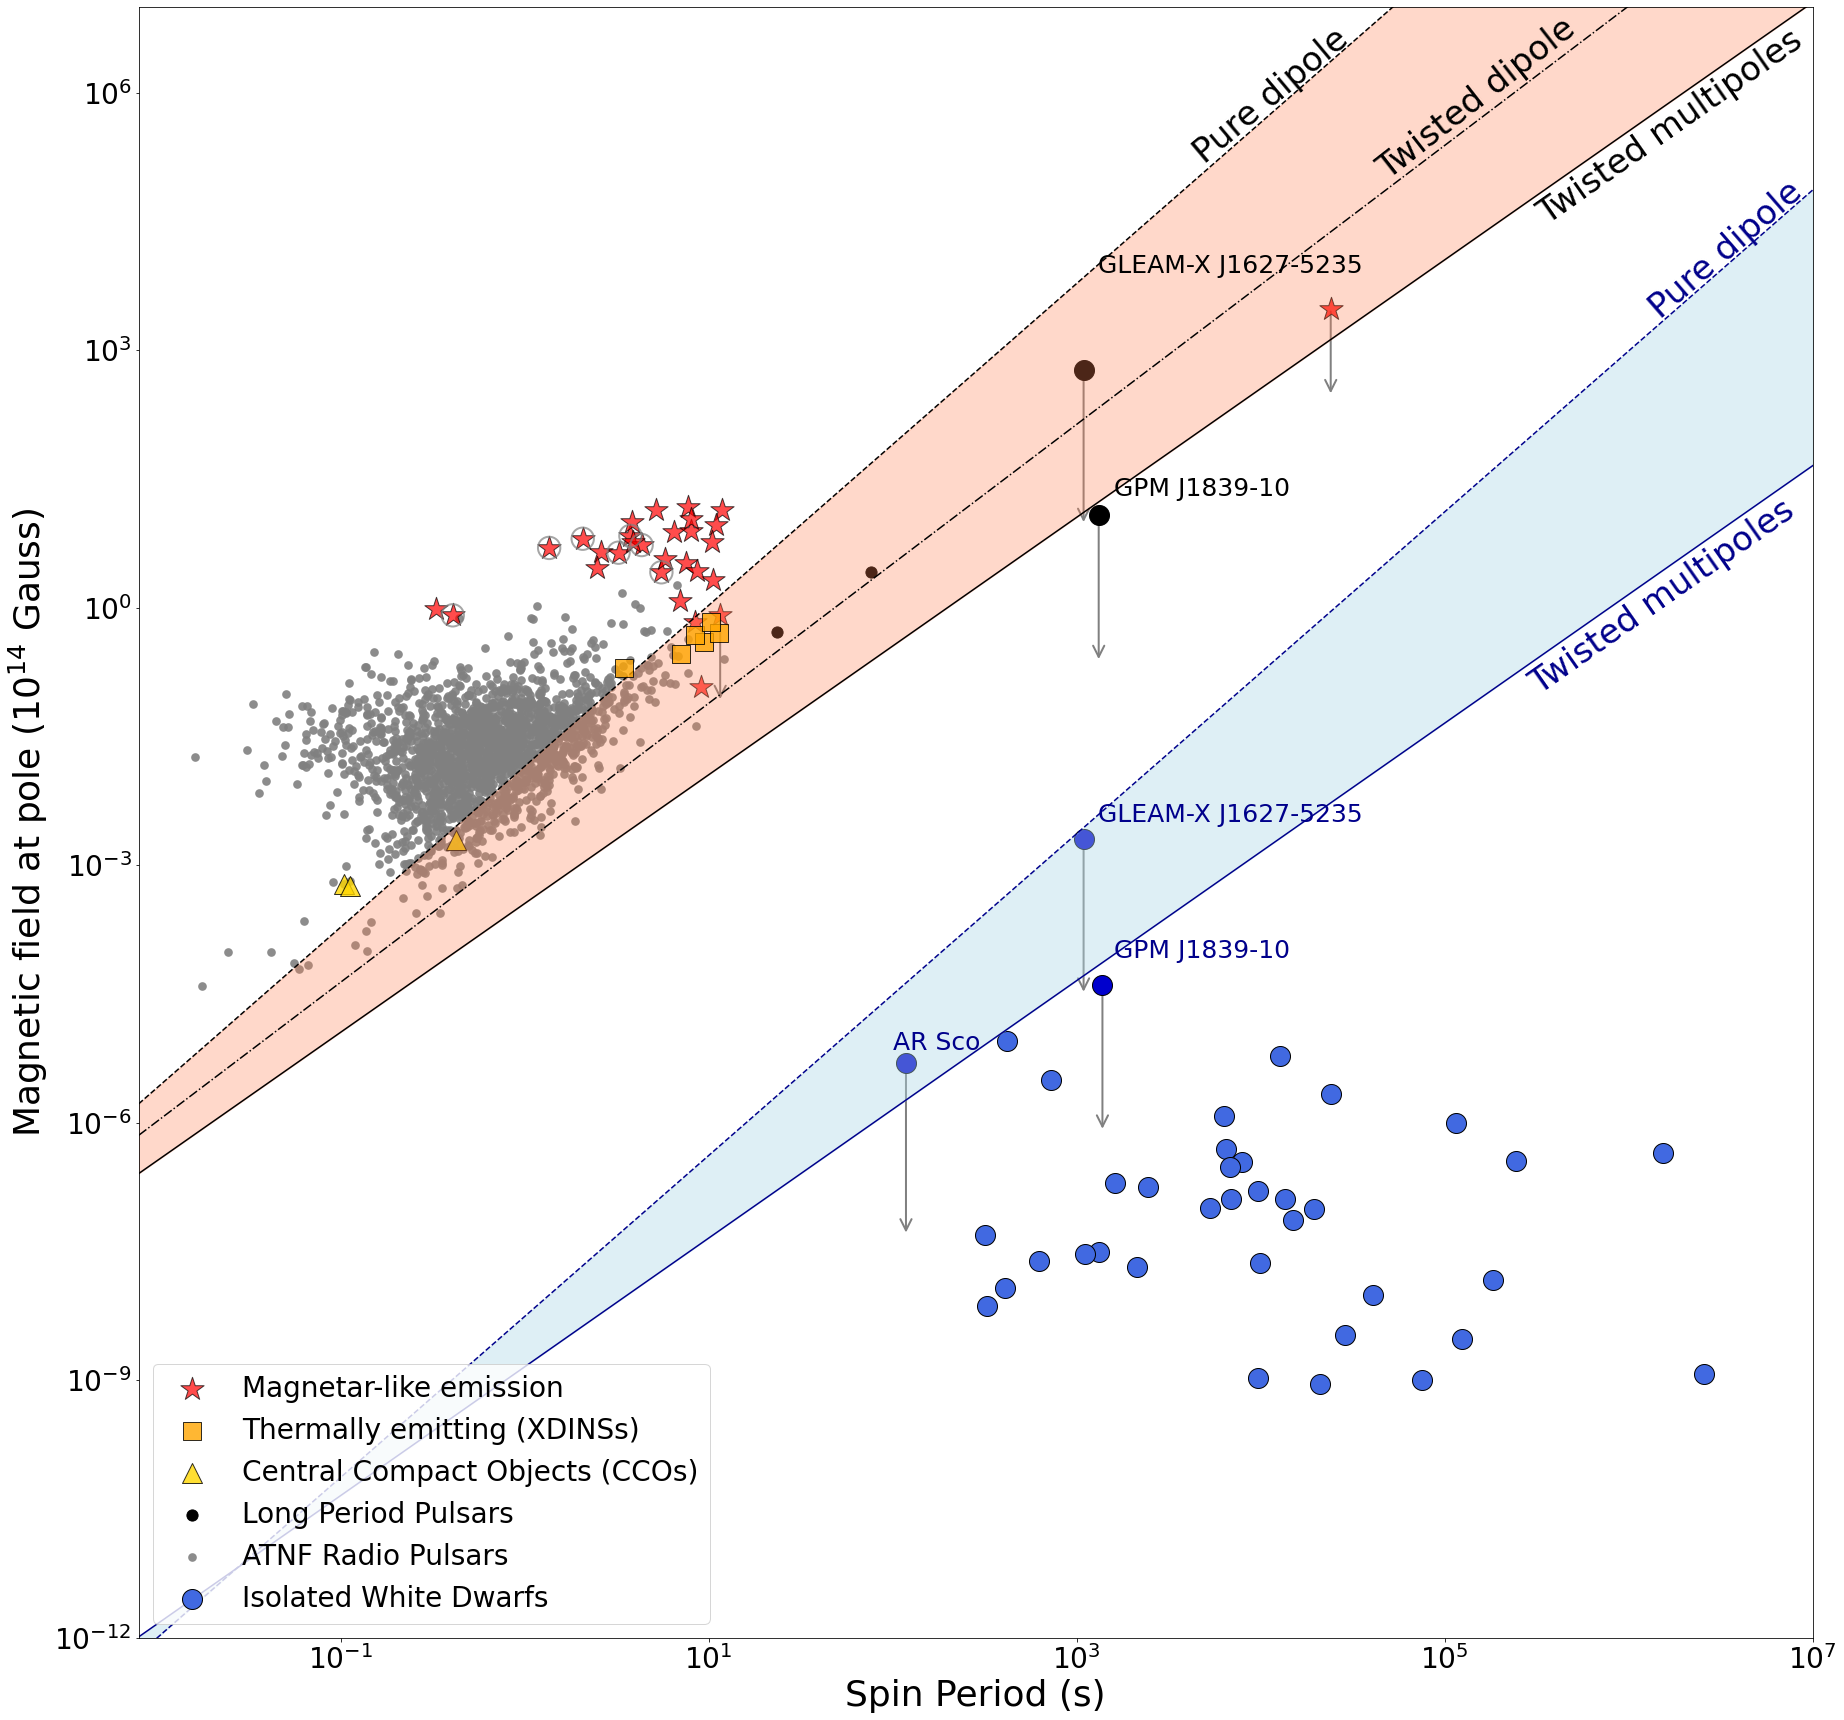

In [14]:

plt.rcParams['figure.figsize'] = (30,30)
plt.rcParams.update({'font.size': 28})

from adjustText import adjust_text

#my_cmap = "viridis"
texts = []
inside_text_size = 28

#cbar = plt.colorbar()
from matplotlib import colors

#my_norm = colors.LogNorm(vmin=0.0001, vmax=50)


# Magnetars 
selection = (df_sources_data['class']=='Magnetar') 
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)'],
            color='red',
            alpha=0.7, 
            marker='*',
            edgecolors='black',
            s=600,
            label='Magnetar-like emission')

   
#for index, row in df_sources_data[selection].iterrows():
#    if row['source']=='SwiftJ1818.0-1607':
#        texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
#                              row['source'], ha='center', va='center', color='black', size=inside_text_size))
#                               size=16, weight='bold'                                       
#    else:
#        texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
#                              row['source'], ha='center', va='center', color='black', size=inside_text_size))
       


for index, row in df_sources_data[selection].iterrows():    
 
  # Plot radio magnetars
    if row['radio']==True:
        plt.scatter(row['period(s)'], row['Bp(e14G)'], 
                    s=500, facecolors='none', edgecolors='grey', linewidths=2, alpha=0.7)

  #  if row['radio']==True:    
  #      texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
  #                            row['source'], ha='center', va='center', color='black', size=inside_text_size))
                                         
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['Bp(e14G)']/10), 
                    xytext=(row['period(s)'], row['Bp(e14G)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)
     
    

#XDINS 
selection = (df_sources_data['class']=='XDINS')
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)'], 
            color='orange',
             marker='s',
            edgecolors='black',
             s=300,
             alpha=0.8, zorder=3,
             label='Thermally emitting (XDINSs)')


#CCOs
selection = ((df_sources_data['class']=='CCO') & (~np.isnan(df_sources_data['Edot(e33erg/s)'])))
#selection = ((df_sources_data['class']=='CCO') & (~np.isnan(df_sources_data['source']=='1E161348-5055')))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)'],
            color='gold',
            alpha=0.8, 
            marker='^',
            edgecolors='black',
            s=400,
            #color='grey',
            label='Central Compact Objects (CCOs)')



#RCW103
selection = ((df_sources_data['source']=='1E161348-5055'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)'],
            alpha=0.8, 
            marker='*',
            edgecolors='black',
            s=600,
            color='red',
            )


for index, row in df_sources_data[selection].iterrows():  
#    texts.append(plt.text(row['period(s)'], row['Bp(e14G)'], 
#                         row['source'], ha='center', va='center', color='black', size=inside_text_size))
    
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['Bp(e14G)']/10), 
                    xytext=(row['period(s)'], row['Bp(e14G)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)    
        
        

#LongP - GLEAM-XJ162759-523504 
selection = ((df_sources_data['source']=='PSRJ0250+5854') | (df_sources_data['source']=='PSRJ0901-4046'))
#selection = (df_sources_data['source']=='PSRJ0250+5854')
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)'], 
            alpha=1, 
            marker='.',
            edgecolors='black',
            s=500,
            color='black',
            label='Long Period Pulsars')

#for index, row in df_sources_data[selection].iterrows():
#    texts.append(plt.text(row['period(s)'], row['Bp(e14G)'], 
#                         row['source'], ha='center', va='center', color='black', size=inside_text_size))

 # Plot radio magnetars
 #   if row['radio']==True:
 #       plt.scatter(row['period(s)'], row['pdot(1e-11s/s)'], 
 #                   s=400, facecolors='none', edgecolors='grey', linewidths=2, alpha=0.7)
    


#GLEAM-XJ162759-523504
selection = ((df_sources_data['source']=='GLEAM-XJ162759-523504'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)']*0.63,
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=400,
            color='black')

for index, row in df_sources_data[selection].iterrows():  
#    texts.append(plt.text(row['period(s)'], row['Bp(e14G)'], 
#                         row['source'], ha='center', va='center', color='black', size=inside_text_size))
    
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['Bp(e14G)']/100), 
                    xytext=(row['period(s)'], row['Bp(e14G)']*0.63),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)    
        
 # Plot radio magnetars
 #   if row['radio']==True:
 #       plt.scatter(row['period(s)'], row['pdot(1e-11s/s)'], 
 #                   s=300, facecolors='none', edgecolors='grey', linewidths=2, alpha=0.7)

    
    
#GMP J1839-10
selection = ((df_sources_data['source']=='GPMJ1839-10'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)']/2, 
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=400,
            color='black')

for index, row in df_sources_data[selection].iterrows():  
#    texts.append(plt.text(row['period(s)'], row['Bp(e14G)'], 
#                         row['source'], ha='center', va='center', color='black', size=inside_text_size))
    
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['Bp(e14G)']/100), 
                    xytext=(row['period(s)'], row['Bp(e14G)']/2),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)    
       
    
# ATNF pulsars
#selection = (~np.isnan(df_atnf_data['BINARY'=*])
plt.scatter(x=df_atnf_data['P0'], 
            y=df_atnf_data['BSURF']/0.5e14, 
            color='grey',
             marker='.', zorder=-3,
             edgecolors='grey',
             s=300,
             alpha=0.9, 
             linewidth=0,
             label='ATNF Radio Pulsars')


#WD B-fields       
selection = ((df_wd_data['Type']=='WD'))
plt.scatter(x=df_wd_data[selection]['P_rot(d)']*86400, 
            y=df_wd_data[selection]['B(MG)']/1.e8, 
            alpha=1,
            marker='o',
            edgecolors='black',
            s=400,
            color='royalblue',
           label='Isolated White Dwarfs')



    
# WD pulsar assumption for AR Sco
selection = ((df_wd_data['WDname']=='AR Sco'))
plt.scatter(x=df_wd_data[selection]['P_rot(d)']*86400, 
            y=df_wd_data[selection]['B(MG)']/1.e8, 
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=400,
            color='mediumblue')

for index, row in df_wd_data[selection].iterrows():
#    texts.append(plt.text(row['P_rot(d)']*86400, row['B(MG)']/1.e8, 
#                         row['WDname'], ha='center', va='center', color='mediumblue', size=inside_text_size))

    # Plot B upperlimits
    if row['Type']=='AR Sco':
        plt.annotate("", xy=(row['P_rot(d)']*86400, row['B(MG)']/1.e10), 
                    xytext=(row['P_rot(d)']*86400, row['B(MG)']/1.e8),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)   
        
        

# WD assumption GLEAM-XJ162759-523504
selection = ((df_wd_data['WDname']=='GLEAM-XJ162759-523504'))
plt.scatter(x=df_wd_data[selection]['P_rot(d)']*86400, 
            y=df_wd_data[selection]['B(MG)']*0.63/1.e8, 
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=400,
            color='mediumblue')


for index, row in df_wd_data[selection].iterrows():
#    texts.append(plt.text(row['P_rot(d)']*86400, row['B(MG)']/1.e8, 
#                         row['WDname'], ha='center', va='center', color='black', size=inside_text_size))
 

    # Plot B upperlimits
    if row['Type']=='LongP':
        plt.annotate("", xy=(row['P_rot(d)']*86400, row['B(MG)']/1.e10), 
                    xytext=(row['P_rot(d)']*86400, row['B(MG)']*0.63/1.e8),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7) 


    
# WD assumption GMP J1839-10
selection = ((df_wd_data['WDname']=='GPMJ1839-10'))
plt.scatter(x=df_wd_data[selection]['P_rot(d)']*86400, 
            y=df_wd_data[selection]['B(MG)']/2.e8, 
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=400,
            color='mediumblue')

for index, row in df_wd_data[selection].iterrows():
#    texts.append(plt.text(row['P_rot(d)']*86400, row['B(MG)']/1.e8, 
#                         row['WDname'], ha='center', va='center', color='black', weight='bold', size=inside_text_size))

    # Plot B upperlimits
    if row['Type']=='LongP':
        plt.annotate("", xy=(row['P_rot(d)']*86400, row['B(MG)']/1.e10), 
                    xytext=(row['P_rot(d)']*86400, row['B(MG)']/2.e8),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)       
        
        
plt.legend(fontsize=28, loc='lower left')
ax = plt.gca()
leg = ax.get_legend()
#leg.legendHandles[0].set_color('grey')
#leg.legendHandles[1].set_color('grey')
#leg.legendHandles[2].set_color('grey')
#leg.legendHandles[3].set_color('grey')
#leg.legendHandles[4].set_color('grey')
#plt.grid()

#adjust_text(texts, x, y, arrowprops=dict(arrowstyle="->", color='r', lw=0.5), autoalign='')
            #, only_move={'points':'y', 'text':'y'})
adjust_text(texts, only_move={'text':'x'})
#, arrowprops=dict(arrowstyle='->', color='lightgrey'))


#plot a linear function

#x00= 2.e2
#y00=0.00002
#plt.text(x00, y00, 'ISOLATED PULSAR POPULATION', color='black', alpha=1, size=32, ha='left')

plt.text(1300, 8000, 'GLEAM-X J1627-5235', color='black', alpha=1, size=25)
plt.text(1300, 320000/1.e8, 'GLEAM-X J1627-5235', color='darkblue', alpha=1, size=25)

plt.text(1600, 20, 'GPM J1839-10', color='black', alpha=1, size=25)
plt.text(1600, 8300/1.e8, 'GPM J1839-10', color='darkblue', alpha=1, size=25)

plt.text(100, 700/1.e8, 'AR Sco', color='darkblue', alpha=1, size=25)

x = np.linspace(8e-3,1e7,2000)

y1pd = 2.2*1.e12 * (1.2)**(-19/8) * x**(15/8)/1.e14
plt.plot(x,y1pd, linestyle='dashed', color='black', markersize=12, alpha=1)
x11=4e3
y11 = 2.2*1.e12 * (1.2)**(-19/8) * x11**(15/8)/1.e14
plt.text(x11, y11*1.9, 'Pure dipole', color='black', alpha=1, rotation=40, size=34)

y1twd = 2.7*1.e11 * (1.2)**(-17/8) * x**(13/8)/1.e14
plt.plot(x,y1twd, linestyle='dashdot', color='black', markersize=12, alpha=1)
x22=4e4
y22 = 2.2*1.e11 * (1.2)**(-17/8) * x22**(13/8)/1.e14
plt.text(x22, y22*2.2, 'Twisted dipole', color='black', alpha=1, rotation=38, size=34)

beta = 10
"""
y1spot = 2.7*1.e11 * beta**(-1/8) * (1.2)**(-17/8) * x**(13/8)/1.e14
plt.plot(x,y1spot, linestyle='dotted', color='black', markersize=12, alpha=1)
x33=2.5e5
y33 = 2.7*1.e11 * beta**(-1/8) * (1.2)**(-17/8) * x33**(13/8)/1.e14
plt.text(x33, y33*0.5, 'Star-spot', color='black', alpha=1, rotation=37, size=34)
"""

beta = 10
y1tw_multi = 9.2*1.e10 * beta**(-1/4) * (1.2)**(-2) * x**(3/2)/1.e14
plt.plot(x,y1tw_multi, linestyle='solid', color='black', markersize=12, alpha=1)
x44=3e5
y44 = 9.2*1.e10 * beta**(-1/4) * (1.2)**(-2) * x44**(3/2)/1.e14
plt.text(x44, y44*0.5, 'Twisted multipoles', color='black', alpha=1, rotation=35, size=34)



#WD death-lines

#Pure dipole
y1pd_wd = 2.2*1.e12 * (600)**(-19/8) * x**(15/8)/1.e14
plt.plot(x,y1pd_wd, linestyle='dashed', color='darkblue', markersize=12, alpha=1)
x1=1.2e6
y1 = 2.2*1.e12 * (600)**(-19/8) * x1**(15/8)/1.e14
plt.text(x1, y1*1.7, 'Pure dipole', color='darkblue', alpha=1, rotation=41, size=34)


#Pure twisted multipoles
beta = 10
y1tw_multi_wd = 9.2*1.e10 * beta**(-1/4) * (600)**(-2) * x**(3/2)/1.e14
plt.plot(x,y1tw_multi_wd, linestyle='solid', color='darkblue', markersize=12, alpha=1)
x2=2.7e5
y2 =9.2*1.e10 * beta**(-1/4) * (600)**(-2) * x2**(3/2)/1.e14
plt.text(x2, y2*0.5, 'Twisted multipoles', color='darkblue', alpha=1, rotation=35, size=34)


plt.fill_between(x, y1pd, y1tw_multi, color='coral', alpha=0.3)
plt.fill_between(x, y1pd_wd, y1tw_multi_wd, color='lightblue', alpha=0.4)


plt.xlabel(r'Spin Period (s)', size=36)
plt.ylabel(r'Magnetic field at pole ($10^{14}$ Gauss)', size=36)


plt.yscale('log')
plt.xscale('log')


plt.xlim(8e-3, 1.e7)
plt.ylim(1e-12, 1.e7)

#plt.show()
plt.savefig('P_B_data_WD_NS_gpm1839_death_lines_1sigma.pdf')

## GENERAL Death - line plot 

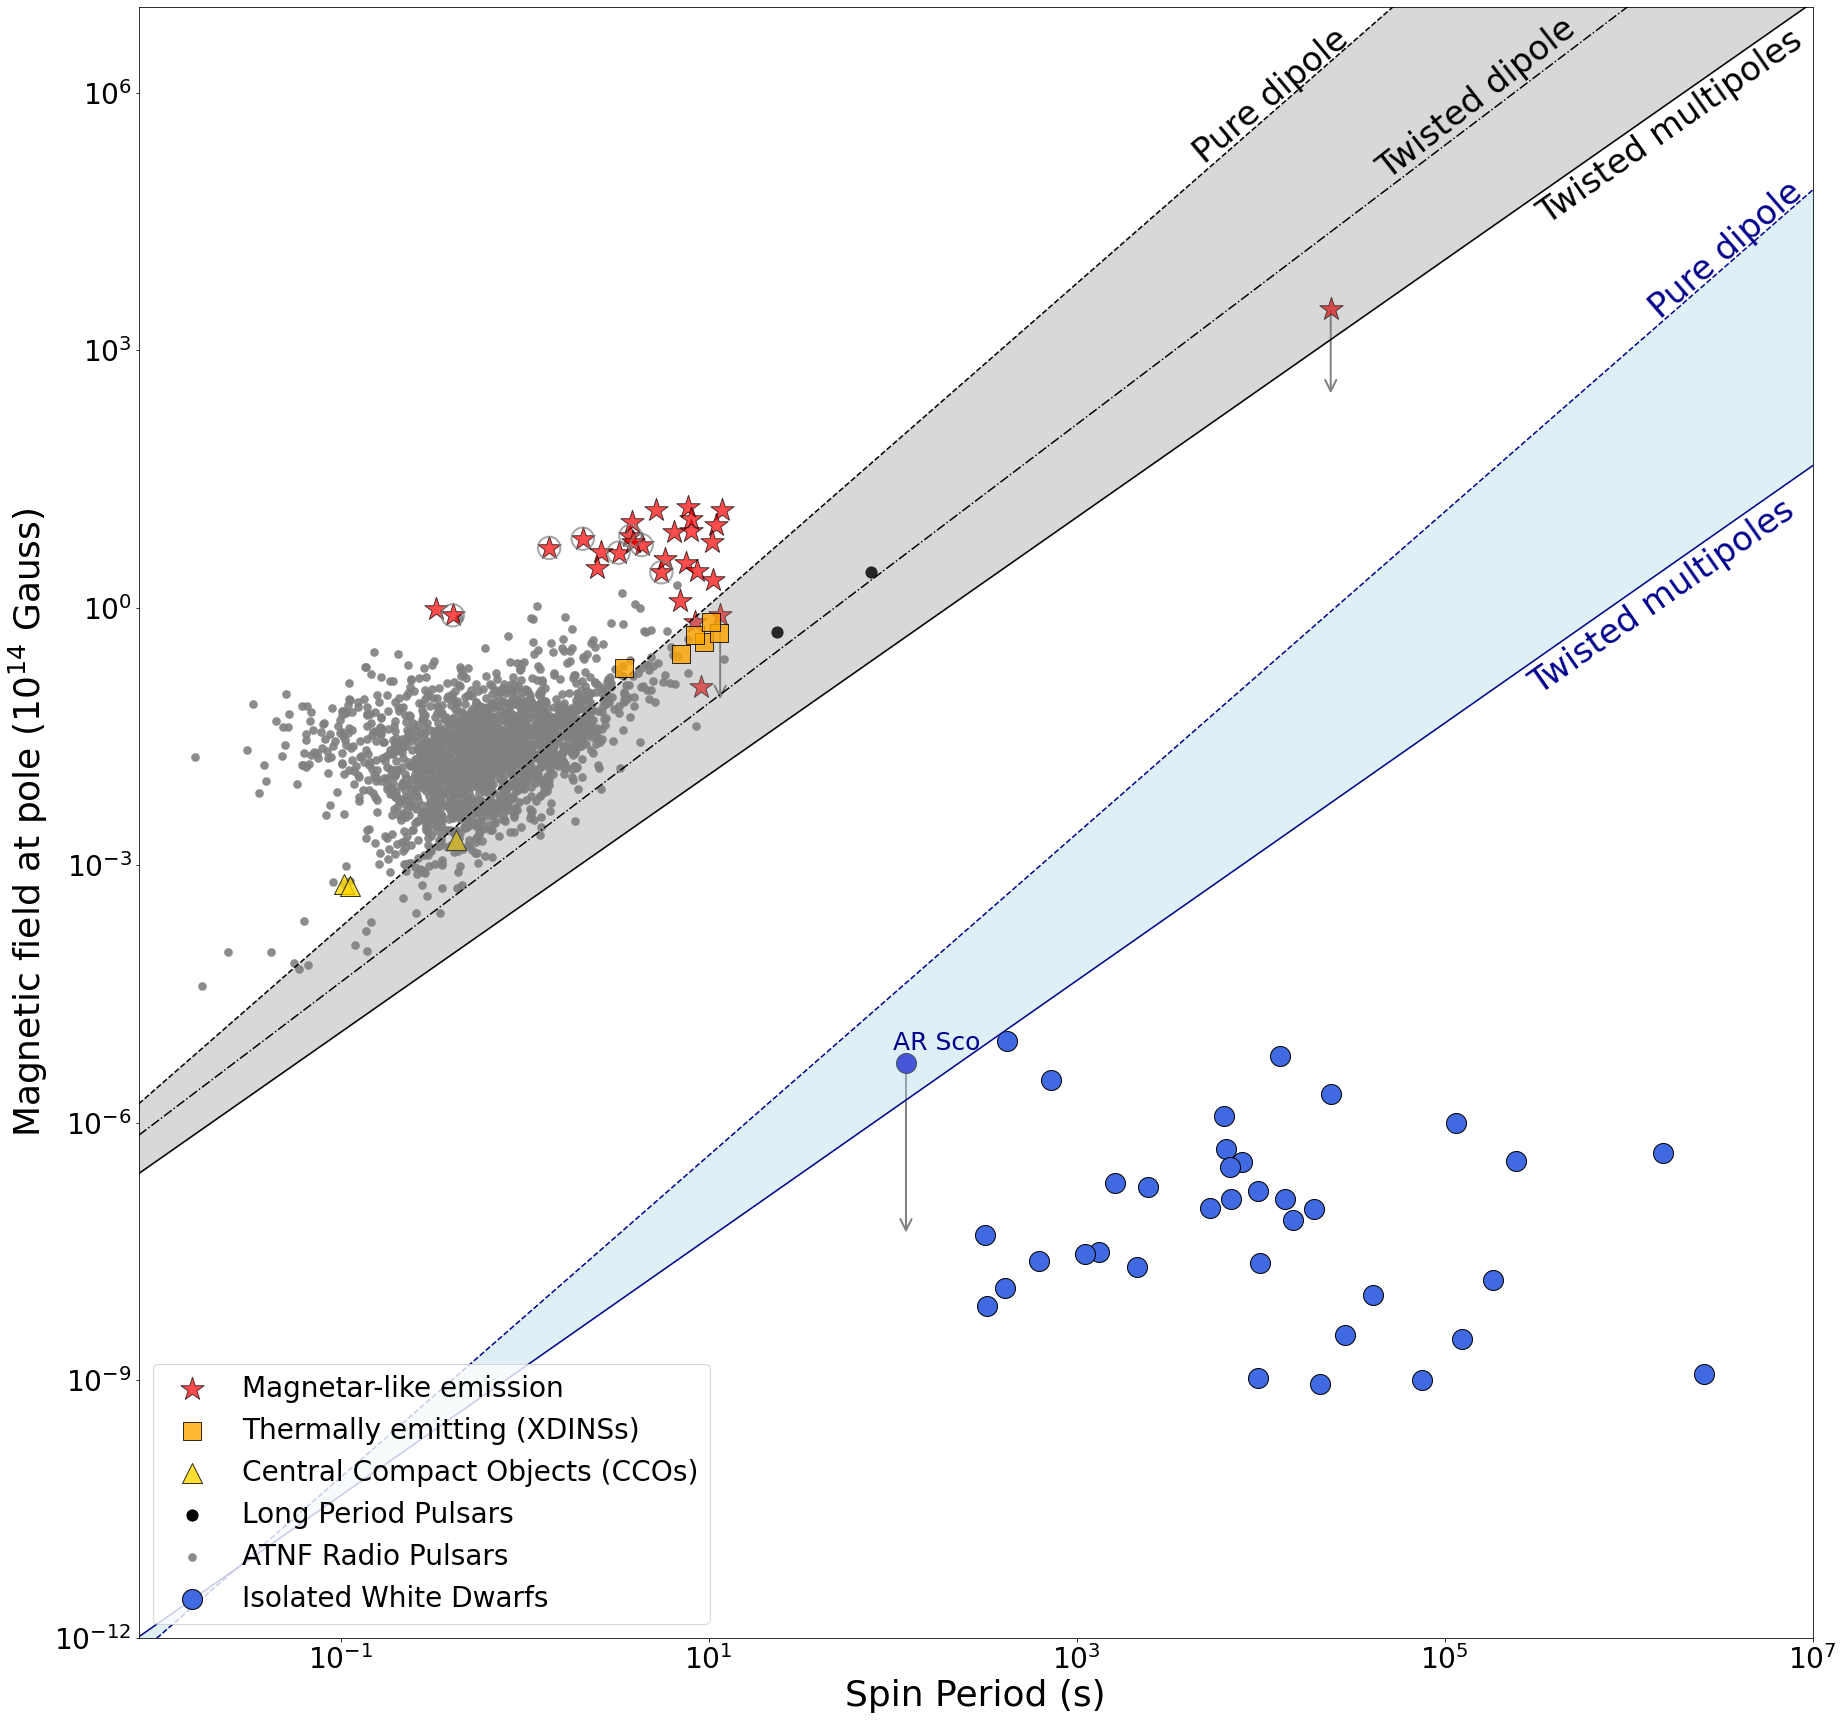

In [15]:

plt.rcParams['figure.figsize'] = (30,30)
plt.rcParams.update({'font.size': 28})

from adjustText import adjust_text

#my_cmap = "viridis"
texts = []
inside_text_size = 28

#cbar = plt.colorbar()
from matplotlib import colors

#my_norm = colors.LogNorm(vmin=0.0001, vmax=50)


# Magnetars 
selection = (df_sources_data['class']=='Magnetar') 
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)'],
            color='red',
            alpha=0.7, 
            marker='*',
            edgecolors='black',
            s=600,
            label='Magnetar-like emission')

   
#for index, row in df_sources_data[selection].iterrows():
#    if row['source']=='SwiftJ1818.0-1607':
#        texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
#                              row['source'], ha='center', va='center', color='black', size=inside_text_size))
#                               size=16, weight='bold'                                       
#    else:
#        texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
#                              row['source'], ha='center', va='center', color='black', size=inside_text_size))
       


for index, row in df_sources_data[selection].iterrows():    
 
  # Plot radio magnetars
    if row['radio']==True:
        plt.scatter(row['period(s)'], row['Bp(e14G)'], 
                    s=500, facecolors='none', edgecolors='grey', linewidths=2, alpha=0.7)

  #  if row['radio']==True:    
  #      texts.append(plt.text(row['period(s)'], row['pdot(1e-11s/s)'], 
  #                            row['source'], ha='center', va='center', color='black', size=inside_text_size))
                                         
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['Bp(e14G)']/10), 
                    xytext=(row['period(s)'], row['Bp(e14G)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)
     
    

#XDINS 
selection = (df_sources_data['class']=='XDINS')
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)'], 
            color='orange',
             marker='s',
            edgecolors='black',
             s=300,
             alpha=0.8, zorder=3,
             label='Thermally emitting (XDINSs)')


#CCOs
selection = ((df_sources_data['class']=='CCO') & (~np.isnan(df_sources_data['Edot(e33erg/s)'])))
#selection = ((df_sources_data['class']=='CCO') & (~np.isnan(df_sources_data['source']=='1E161348-5055')))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)'],
            color='gold',
            alpha=0.8, 
            marker='^',
            edgecolors='black',
            s=400,
            #color='grey',
            label='Central Compact Objects (CCOs)')



#RCW103
selection = ((df_sources_data['source']=='1E161348-5055'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)'],
            alpha=0.8, 
            marker='*',
            edgecolors='black',
            s=600,
            color='red',
            )


for index, row in df_sources_data[selection].iterrows():  
#    texts.append(plt.text(row['period(s)'], row['Bp(e14G)'], 
#                         row['source'], ha='center', va='center', color='black', size=inside_text_size))
    
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['Bp(e14G)']/10), 
                    xytext=(row['period(s)'], row['Bp(e14G)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)    
        
        

#LongP - GLEAM-XJ162759-523504 
selection = ((df_sources_data['source']=='PSRJ0250+5854') | (df_sources_data['source']=='PSRJ0901-4046'))
#selection = (df_sources_data['source']=='PSRJ0250+5854')
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)'], 
            alpha=1, 
            marker='.',
            edgecolors='black',
            s=500,
            color='black',
            label='Long Period Pulsars')

#for index, row in df_sources_data[selection].iterrows():
#    texts.append(plt.text(row['period(s)'], row['Bp(e14G)'], 
#                         row['source'], ha='center', va='center', color='black', size=inside_text_size))

 # Plot radio magnetars
 #   if row['radio']==True:
 #       plt.scatter(row['period(s)'], row['pdot(1e-11s/s)'], 
 #                   s=400, facecolors='none', edgecolors='grey', linewidths=2, alpha=0.7)
    

"""
#GLEAM-XJ162759-523504
selection = ((df_sources_data['source']=='GLEAM-XJ162759-523504'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)']*0.63,
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=400,
            color='black')

for index, row in df_sources_data[selection].iterrows():  
#    texts.append(plt.text(row['period(s)'], row['Bp(e14G)'], 
#                         row['source'], ha='center', va='center', color='black', size=inside_text_size))
    
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['Bp(e14G)']/100), 
                    xytext=(row['period(s)'], row['Bp(e14G)']*0.63),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)    
        
 # Plot radio magnetars
 #   if row['radio']==True:
 #       plt.scatter(row['period(s)'], row['pdot(1e-11s/s)'], 
 #                   s=300, facecolors='none', edgecolors='grey', linewidths=2, alpha=0.7)

    
    
#GMP J1839-10
selection = ((df_sources_data['source']=='GPMJ1839-10'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['Bp(e14G)']/2, 
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=400,
            color='black')

for index, row in df_sources_data[selection].iterrows():  
#    texts.append(plt.text(row['period(s)'], row['Bp(e14G)'], 
#                         row['source'], ha='center', va='center', color='black', size=inside_text_size))
    
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['Bp(e14G)']/100), 
                    xytext=(row['period(s)'], row['Bp(e14G)']/2),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)    
  
"""
    
# ATNF pulsars
#selection = (~np.isnan(df_atnf_data['BINARY'=*])
plt.scatter(x=df_atnf_data['P0'], 
            y=df_atnf_data['BSURF']/0.5e14, 
            color='grey',
             marker='.', zorder=-3,
             edgecolors='grey',
             s=300,
             alpha=0.9, 
             linewidth=0,
             label='ATNF Radio Pulsars')


#WD B-fields       
selection = ((df_wd_data['Type']=='WD'))
plt.scatter(x=df_wd_data[selection]['P_rot(d)']*86400, 
            y=df_wd_data[selection]['B(MG)']/1.e8, 
            alpha=1,
            marker='o',
            edgecolors='black',
            s=400,
            color='royalblue',
           label='Isolated White Dwarfs')



    
# WD pulsar assumption for AR Sco
selection = ((df_wd_data['WDname']=='AR Sco'))
plt.scatter(x=df_wd_data[selection]['P_rot(d)']*86400, 
            y=df_wd_data[selection]['B(MG)']/1.e8, 
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=400,
            color='mediumblue')

for index, row in df_wd_data[selection].iterrows():
#    texts.append(plt.text(row['P_rot(d)']*86400, row['B(MG)']/1.e8, 
#                         row['WDname'], ha='center', va='center', color='mediumblue', size=inside_text_size))

    # Plot B upperlimits
    if row['Type']=='AR Sco':
        plt.annotate("", xy=(row['P_rot(d)']*86400, row['B(MG)']/1.e10), 
                    xytext=(row['P_rot(d)']*86400, row['B(MG)']/1.e8),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)   
        
        
"""
# WD assumption GLEAM-XJ162759-523504
selection = ((df_wd_data['WDname']=='GLEAM-XJ162759-523504'))
plt.scatter(x=df_wd_data[selection]['P_rot(d)']*86400, 
            y=df_wd_data[selection]['B(MG)']*0.63/1.e8, 
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=400,
            color='mediumblue')


for index, row in df_wd_data[selection].iterrows():
#    texts.append(plt.text(row['P_rot(d)']*86400, row['B(MG)']/1.e8, 
#                         row['WDname'], ha='center', va='center', color='black', size=inside_text_size))
 

    # Plot B upperlimits
    if row['Type']=='LongP':
        plt.annotate("", xy=(row['P_rot(d)']*86400, row['B(MG)']/1.e10), 
                    xytext=(row['P_rot(d)']*86400, row['B(MG)']*0.63/1.e8),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7) 


    
# WD assumption GMP J1839-10
selection = ((df_wd_data['WDname']=='GPMJ1839-10'))
plt.scatter(x=df_wd_data[selection]['P_rot(d)']*86400, 
            y=df_wd_data[selection]['B(MG)']/2.e8, 
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=400,
            color='mediumblue')

for index, row in df_wd_data[selection].iterrows():
#    texts.append(plt.text(row['P_rot(d)']*86400, row['B(MG)']/1.e8, 
#                         row['WDname'], ha='center', va='center', color='black', weight='bold', size=inside_text_size))

    # Plot B upperlimits
    if row['Type']=='LongP':
        plt.annotate("", xy=(row['P_rot(d)']*86400, row['B(MG)']/1.e10), 
                    xytext=(row['P_rot(d)']*86400, row['B(MG)']/2.e8),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)       
"""       
        
plt.legend(fontsize=28, loc='lower left')
ax = plt.gca()
leg = ax.get_legend()
#leg.legendHandles[0].set_color('grey')
#leg.legendHandles[1].set_color('grey')
#leg.legendHandles[2].set_color('grey')
#leg.legendHandles[3].set_color('grey')
#leg.legendHandles[4].set_color('grey')
#plt.grid()

#adjust_text(texts, x, y, arrowprops=dict(arrowstyle="->", color='r', lw=0.5), autoalign='')
            #, only_move={'points':'y', 'text':'y'})
adjust_text(texts, only_move={'text':'x'})
#, arrowprops=dict(arrowstyle='->', color='lightgrey'))


#plot a linear function

#x00= 2.e2
#y00=0.00002
#plt.text(x00, y00, 'ISOLATED PULSAR POPULATION', color='black', alpha=1, size=32, ha='left')

""" 
plt.text(1300, 8000, 'GLEAM-X J1627-5235', color='black', alpha=1, size=25)
plt.text(1300, 320000/1.e8, 'GLEAM-X J1627-5235', color='darkblue', alpha=1, size=25)

plt.text(1600, 20, 'GPM J1839-10', color='black', alpha=1, size=25)
plt.text(1600, 8300/1.e8, 'GPM J1839-10', color='darkblue', alpha=1, size=25)
"""

plt.text(100, 700/1.e8, 'AR Sco', color='darkblue', alpha=1, size=25)

x = np.linspace(8e-3,1e7,2000)

y1pd = 2.2*1.e12 * (1.2)**(-19/8) * x**(15/8)/1.e14
plt.plot(x,y1pd, linestyle='dashed', color='black', markersize=12, alpha=1)
x11=4e3
y11 = 2.2*1.e12 * (1.2)**(-19/8) * x11**(15/8)/1.e14
plt.text(x11, y11*1.9, 'Pure dipole', color='black', alpha=1, rotation=40, size=34)

y1twd = 2.7*1.e11 * (1.2)**(-17/8) * x**(13/8)/1.e14
plt.plot(x,y1twd, linestyle='dashdot', color='black', markersize=12, alpha=1)
x22=4e4
y22 = 2.2*1.e11 * (1.2)**(-17/8) * x22**(13/8)/1.e14
plt.text(x22, y22*2.2, 'Twisted dipole', color='black', alpha=1, rotation=38, size=34)

beta = 10
"""
y1spot = 2.7*1.e11 * beta**(-1/8) * (1.2)**(-17/8) * x**(13/8)/1.e14
plt.plot(x,y1spot, linestyle='dotted', color='black', markersize=12, alpha=1)
x33=2.5e5
y33 = 2.7*1.e11 * beta**(-1/8) * (1.2)**(-17/8) * x33**(13/8)/1.e14
plt.text(x33, y33*0.5, 'Star-spot', color='black', alpha=1, rotation=37, size=34)
"""

beta = 10
y1tw_multi = 9.2*1.e10 * beta**(-1/4) * (1.2)**(-2) * x**(3/2)/1.e14
plt.plot(x,y1tw_multi, linestyle='solid', color='black', markersize=12, alpha=1)
x44=3e5
y44 = 9.2*1.e10 * beta**(-1/4) * (1.2)**(-2) * x44**(3/2)/1.e14
plt.text(x44, y44*0.5, 'Twisted multipoles', color='black', alpha=1, rotation=35, size=34)



#WD death-lines

#Pure dipole
y1pd_wd = 2.2*1.e12 * (600)**(-19/8) * x**(15/8)/1.e14
plt.plot(x,y1pd_wd, linestyle='dashed', color='darkblue', markersize=12, alpha=1)
x1=1.2e6
y1 = 2.2*1.e12 * (600)**(-19/8) * x1**(15/8)/1.e14
plt.text(x1, y1*1.7, 'Pure dipole', color='darkblue', alpha=1, rotation=41, size=34)


#Pure twisted multipoles
beta = 10
y1tw_multi_wd = 9.2*1.e10 * beta**(-1/4) * (600)**(-2) * x**(3/2)/1.e14
plt.plot(x,y1tw_multi_wd, linestyle='solid', color='darkblue', markersize=12, alpha=1)
x2=2.7e5
y2 =9.2*1.e10 * beta**(-1/4) * (600)**(-2) * x2**(3/2)/1.e14
plt.text(x2, y2*0.5, 'Twisted multipoles', color='darkblue', alpha=1, rotation=35, size=34)


plt.fill_between(x, y1pd, y1tw_multi, color='grey', alpha=0.3)
plt.fill_between(x, y1pd_wd, y1tw_multi_wd, color='lightblue', alpha=0.4)


plt.xlabel(r'Spin Period (s)', size=36)
plt.ylabel(r'Magnetic field at pole ($10^{14}$ Gauss)', size=36)


plt.yscale('log')
plt.xscale('log')


plt.xlim(8e-3, 1.e7)
plt.ylim(1e-12, 1.e7)

#plt.show()
plt.savefig('P_B_data_WD_NS_death_lines.pdf')